In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
import transbigdata as tbd
import regex as re
pd.set_option('display.max_columns', None)

In [3]:
import fiona
fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [4]:
route =  r'../data/external/Ligne-101.kml'

In [5]:
linegstop = gpd.GeoDataFrame.from_file(route,driver='KML')
line = linegstop.iloc[0:1].copy()
stops = linegstop.drop([0])


In [6]:
linegstop.head()

,Name,Description,geometry
0,Ligne 101,,"LINESTRING (5.39210 36.18485, 5.39219 36.18577..."
1,GR,,POINT (5.39196 36.18542)
2,CFA01,,POINT (5.39497 36.18572)
3,CFA02,,POINT (5.39865 36.18503)
4,SAMU,,POINT (5.39862 36.18096)


In [7]:
line

,Name,Description,geometry
0,Ligne 101,,"LINESTRING (5.39210 36.18485, 5.39219 36.18577..."


<AxesSubplot:>

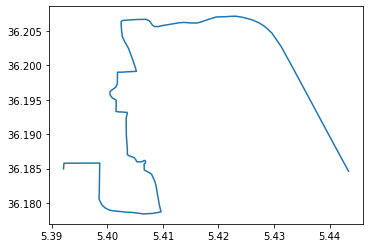

In [8]:
line.plot()

In [9]:
stops.head()

,Name,Description,geometry
1,GR,,POINT (5.39196 36.18542)
2,CFA01,,POINT (5.39497 36.18572)
3,CFA02,,POINT (5.39865 36.18503)
4,SAMU,,POINT (5.39862 36.18096)
5,MAHDI,,POINT (5.39999 36.17926)


<AxesSubplot:>

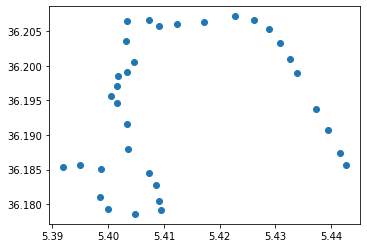

In [10]:
stops.plot()

In [11]:
stops.count()

Name           34
Description    34
geometry       34
dtype: int64

In [12]:
stops['stopname'] = stops['Name']
stops = stops.drop(stops.columns[1],axis=1)
stops = stops.drop(stops.columns[0],axis=1)

In [13]:
stops['lon'] = stops.geometry.apply(lambda p: p.x)
stops['lat'] = stops.geometry.apply(lambda p: p.y)
stops['linename']="101"

In [14]:
stop=stops.loc[:,['linename','stopname','lat','lon','geometry']]
stop.head()

,linename,stopname,lat,lon,geometry
1,101,GR,36.185421,5.391961,POINT (5.39196 36.18542)
2,101,CFA01,36.185718,5.394972,POINT (5.39497 36.18572)
3,101,CFA02,36.185034,5.398654,POINT (5.39865 36.18503)
4,101,SAMU,36.180957,5.398621,POINT (5.39862 36.18096)
5,101,MAHDI,36.179260,5.399993,POINT (5.39999 36.17926)


In [15]:
import folium
from xml.dom import minidom

# Parse the KML file to extract the coordinates
kml = minidom.parse("../data/external/Ligne-101.kml")
coordinates = kml.getElementsByTagName("coordinates")[0].firstChild.nodeValue.strip().split("\n")

# Create a list of tuples for the coordinates
coords_list = []
for coord in coordinates:
    lat, lon = coord.split(",")
    coords_list.append((float(lon),float(lat)))

# Create a map centered on your city
map = folium.Map(location=[36.1943, 5.4192], zoom_start=14)

# Add the polyline to the map
folium.PolyLine(
    locations=coords_list,
    weight=3,
    color="blue",
    opacity=1,
).add_to(map)


# Read in your data
df = stops


# Create a feature group for your route
route_group = folium.FeatureGroup(name='Route')

# Loop through your data and add markers for each stop on the route
for index, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['stopname'],
        icon=folium.Icon(color='blue')
    ).add_to(route_group)

# Add the route group to the map
route_group.add_to(map)

# Create a feature group for your bus
bus_group = folium.FeatureGroup(name='Bus')

# Add a marker for your bus
folium.Marker(
    location=[5.439383	,36.190757],
    popup='Bus',
    icon=folium.Icon(color='red', icon='bus', prefix='fa')
).add_to(bus_group)

# Add the bus group to the map
bus_group.add_to(map)

# Add a layer control to the map
folium.LayerControl().add_to(map)
map
# Save the map as an HTML file
#map.save('route_map.html')


In [16]:
BUS_GPS= pd.read_csv(r'../data/interim/DATARAW_FebApr.csv')
#Convert the time column to datetime type
BUS_GPS

,ID,Time,Longitude,Latitude,Speed,Attributes
0,19010-3,2023-03-14 00:00:00,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...
1,19010-3,2023-03-14 00:00:10,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...
2,19010-3,2023-03-14 00:00:20,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...
3,19010-3,2023-03-14 00:00:30,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...
4,19010-3,2023-03-14 00:00:40,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...
...,...,...,...,...,...,...
3892632,19001-3,2023-03-12 23:58:11,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...
3892633,19001-3,2023-03-12 23:58:21,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...
3892634,19001-3,2023-03-12 23:58:31,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...
3892635,19001-3,2023-03-12 23:58:41,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...


In [17]:
BUS_GPS["GPSDateTime"]=BUS_GPS["Time"]
BUS_GPS["GPSDateTime"]=pd.to_datetime(BUS_GPS["GPSDateTime"])
BUS_GPS

,ID,Time,Longitude,Latitude,Speed,Attributes,GPSDateTime
0,19010-3,2023-03-14 00:00:00,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:00
1,19010-3,2023-03-14 00:00:10,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:10
2,19010-3,2023-03-14 00:00:20,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:20
3,19010-3,2023-03-14 00:00:30,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:30
4,19010-3,2023-03-14 00:00:40,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:40
...,...,...,...,...,...,...,...
3892632,19001-3,2023-03-12 23:58:11,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:11
3892633,19001-3,2023-03-12 23:58:21,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:21
3892634,19001-3,2023-03-12 23:58:31,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:31
3892635,19001-3,2023-03-12 23:58:41,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:41


In [18]:
#Convert coordinates
BUS_GPS['lon']=BUS_GPS['Longitude']
BUS_GPS['lat'] = BUS_GPS['Latitude']
BUS_GPS.head(5)

,ID,Time,Longitude,Latitude,Speed,Attributes,GPSDateTime,lon,lat
0,19010-3,2023-03-14 00:00:00,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:00,5.458638,36.172869
1,19010-3,2023-03-14 00:00:10,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:10,5.458638,36.172869
2,19010-3,2023-03-14 00:00:20,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:20,5.458638,36.172869
3,19010-3,2023-03-14 00:00:30,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:30,5.458638,36.172869
4,19010-3,2023-03-14 00:00:40,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:40,5.458638,36.172869


In [19]:
BUS_GPS['ID'] = BUS_GPS['ID'].str.replace('-3', '').str.replace('-2', '')
BUS_GPS['VehicleId']=BUS_GPS['ID']


In [20]:
BUS_GPS['Attributes'] = BUS_GPS['Attributes'].str.replace(r'alarm=vibration  ', '')
BUS_GPS['Attributes'] = BUS_GPS['Attributes'].str.replace(r'alarm=lowBattery  ', '')
BUS_GPS['Attributes'] = BUS_GPS['Attributes'].str.replace(r'alarm=powerCut  ', '')

In [21]:
BUS_GPS

,ID,Time,Longitude,Latitude,Speed,Attributes,GPSDateTime,lon,lat,VehicleId
0,19010,2023-03-14 00:00:00,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:00,5.458638,36.172869,19010
1,19010,2023-03-14 00:00:10,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:10,5.458638,36.172869,19010
2,19010,2023-03-14 00:00:20,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:20,5.458638,36.172869,19010
3,19010,2023-03-14 00:00:30,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:30,5.458638,36.172869,19010
4,19010,2023-03-14 00:00:40,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:40,5.458638,36.172869,19010
...,...,...,...,...,...,...,...,...,...,...
3892632,19001,2023-03-12 23:58:11,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:11,5.460148,36.176930,19001
3892633,19001,2023-03-12 23:58:21,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:21,5.460148,36.176930,19001
3892634,19001,2023-03-12 23:58:31,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:31,5.460148,36.176930,19001
3892635,19001,2023-03-12 23:58:41,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:41,5.460148,36.176930,19001


In [22]:
BUS_GPS['ID'].unique()

array(['19010', '19004', '19003', '19009', '19007', '19008', '19002',
       '19006', '19005', '19001'], dtype=object)

In [23]:
BUS_GPS[['DistanceGap','totaldistance','motion']] =BUS_GPS['Attributes'].str.split('  ', expand=True)

In [24]:
BUS_GPS

,ID,Time,Longitude,Latitude,Speed,Attributes,GPSDateTime,lon,lat,VehicleId,DistanceGap,totaldistance,motion
0,19010,2023-03-14 00:00:00,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:00,5.458638,36.172869,19010,distance=0.0,totalDistance=6948552.77,motion=false
1,19010,2023-03-14 00:00:10,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:10,5.458638,36.172869,19010,distance=0.0,totalDistance=6948552.77,motion=false
2,19010,2023-03-14 00:00:20,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:20,5.458638,36.172869,19010,distance=0.0,totalDistance=6948552.77,motion=false
3,19010,2023-03-14 00:00:30,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:30,5.458638,36.172869,19010,distance=0.0,totalDistance=6948552.77,motion=false
4,19010,2023-03-14 00:00:40,5.458638,36.172869,0.0 km/h,distance=0.0 totalDistance=6948552.77 motion...,2023-03-14 00:00:40,5.458638,36.172869,19010,distance=0.0,totalDistance=6948552.77,motion=false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892632,19001,2023-03-12 23:58:11,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:11,5.460148,36.176930,19001,distance=0.0,totalDistance=4821619.06,motion=false
3892633,19001,2023-03-12 23:58:21,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:21,5.460148,36.176930,19001,distance=0.0,totalDistance=4821619.06,motion=false
3892634,19001,2023-03-12 23:58:31,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:31,5.460148,36.176930,19001,distance=0.0,totalDistance=4821619.06,motion=false
3892635,19001,2023-03-12 23:58:41,5.460148,36.176930,0.0 km/h,distance=0.0 totalDistance=4821619.06 motion...,2023-03-12 23:58:41,5.460148,36.176930,19001,distance=0.0,totalDistance=4821619.06,motion=false


In [25]:
BUS_GPS['DistanceGap'] = BUS_GPS['DistanceGap'].str.replace(r'distance=', '')
BUS_GPS['Speed'] = BUS_GPS['Speed'].str.replace(r'km/h', '')
BUS_GPS['motion'] = BUS_GPS['motion'].str.replace(r'motion=', '')
BUS_GPS['totaldistance'] = BUS_GPS['totaldistance'].str.replace(r'totalDistance=', '')

In [26]:
BUS_GPS=BUS_GPS.loc[:,['VehicleId', 'GPSDateTime', 'lat', 'lon','ID','Speed','motion','DistanceGap','totaldistance']]
BUS_GPS

,VehicleId,GPSDateTime,lat,lon,ID,Speed,motion,DistanceGap,totaldistance
0,19010,2023-03-14 00:00:00,36.172869,5.458638,19010,0.0,false,0.0,6948552.77
1,19010,2023-03-14 00:00:10,36.172869,5.458638,19010,0.0,false,0.0,6948552.77
2,19010,2023-03-14 00:00:20,36.172869,5.458638,19010,0.0,false,0.0,6948552.77
3,19010,2023-03-14 00:00:30,36.172869,5.458638,19010,0.0,false,0.0,6948552.77
4,19010,2023-03-14 00:00:40,36.172869,5.458638,19010,0.0,false,0.0,6948552.77
...,...,...,...,...,...,...,...,...,...
3892632,19001,2023-03-12 23:58:11,36.176930,5.460148,19001,0.0,false,0.0,4821619.06
3892633,19001,2023-03-12 23:58:21,36.176930,5.460148,19001,0.0,false,0.0,4821619.06
3892634,19001,2023-03-12 23:58:31,36.176930,5.460148,19001,0.0,false,0.0,4821619.06
3892635,19001,2023-03-12 23:58:41,36.176930,5.460148,19001,0.0,false,0.0,4821619.06


In [27]:
tbd.visualization_data(BUS_GPS, col=['lon', 'lat'], accuracy=5, height=500, maptype='point', zoom='auto')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [29]:
# set the start and end times
start_time = pd.to_datetime('2023-02-21 00:49:34')
end_time = pd.to_datetime('2023-02-21 23:09:45	')
# filter rows that are between the start and end times
filtered_df = BUS_GPS[(BUS_GPS['GPSDateTime'] >= start_time) & (BUS_GPS['GPSDateTime'] <= end_time)]



filtered_df
from keplergl import KeplerGl

# Read GPS data from CSV file
df = BUS_GPS

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=filtered_df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'bearing': 0, 'dragRotate': True, 'Latitude': 36.185…

In [30]:
dataclean=tbd.clean_outofshape(BUS_GPS, line, col=['lon', 'lat'], accuracy=50)

In [33]:
# set the start and end times
start_time = pd.to_datetime('2023-02-21 00:49:34')
end_time = pd.to_datetime('2023-02-21 23:09:45	')
# filter rows that are between the start and end times
filtered_df = dataclean[(dataclean['GPSDateTime'] >= start_time) & (dataclean['GPSDateTime'] <= end_time)]



filtered_df
from keplergl import KeplerGl

# Read GPS data from CSV file
df = BUS_GPS

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=filtered_df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'bearing': 0, 'dragRotate': True, 'Latitude': 36.185…

In [29]:
tbd.visualization_data(dataclean, col=['lon', 'lat'], accuracy=5, height=500, maptype='point', zoom='auto')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [30]:
arriveinfo, data = tbd.busgps_arriveinfo(dataclean,line,stops,stopbuffer=10,projectoutput=True)

Cleaning data...
Position matching......
Matching arrival and leaving info............................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [31]:
tbd.visualization_data(data, col=['lon', 'lat'], accuracy=5, height=500, maptype='point', zoom='auto')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ytak0zp', 'type': …

In [32]:
arriveinfo.stopname.unique()

array(['GR', 'CFA01', 'CFA02', 'SAMU', 'MAHDI', '1000 LOGTS', 'BIZARD',
       'CENTRE', 'ASSURANCE', 'SOUK', 'LES REMPARTS', 'CHU',
       'MOSQUEE 750', '750 LOGTS 01', '750 LOGTS 02', '750 LOGTS 03',
       'ADE', 'MATERNITE', 'KABOUB', 'BOUSSEKINE', 'GAOUA 01', 'GAOUA 02',
       'CEM', 'MOSQUEE 500', 'STADE 500 LOGTS', '407 LOGTS 01',
       '407 LOGTS 02', 'HACHMI 01', 'HACHMI 02', '1006 LOGTS',
       '1014 LOGTS\xa0', 'LES TOURS 03', 'LES TOURS 02', 'LES TOURS 01'],
      dtype=object)

In [33]:
data

,VehicleId,GPSDateTime,lat,lon,ID,Speed,motion,DistanceGap,totaldistance,geometry,project,time_st
0,0,2023-02-01 06:27:30,36.184616,5.443572,19001,14.9,true,16.51,744900.63,POINT (34514802.504 13295103.478),16960.894524,1647.0
69,0,2023-02-01 06:27:40,36.184968,5.443344,19001,7.3,true,44.2,744944.83,POINT (34514866.421 13295092.219),16896.004273,1657.0
367,0,2023-02-01 06:27:50,36.185030,5.443342,19001,0.0,false,6.83,744951.66,POINT (34514874.505 13295086.301),16887.097170,1667.0
368,0,2023-02-01 06:28:01,36.185052,5.443341,19001,0.0,false,2.47,744954.13,POINT (34514877.468 13295084.215),16883.846042,1678.0
369,0,2023-02-01 06:28:10,36.185069,5.443355,19001,0.0,false,2.25,744956.38,POINT (34514878.577 13295081.105),16882.266100,1687.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1899834,456,2023-03-30 17:23:14,36.179451,5.399610,19010,54.6,true,134.25,8988870.8,POINT (34517687.183 13300227.308),2100.119524,4965791.0
1853791,456,2023-03-30 17:23:24,36.178953,5.401015,19010,36.3,true,137.88,8989008.68,POINT (34517509.211 13300129.750),2316.434785,4965801.0
1773087,456,2023-03-30 17:23:29,36.178841,5.401327,19010,12.4,true,30.7,8989039.38,POINT (34517469.494 13300108.208),2359.338302,4965806.0
1773088,456,2023-03-30 17:23:32,36.178750,5.401342,19010,15.1,true,10.17,8989049.55,POINT (34517456.629 13300115.766),2362.647306,4965809.0


In [34]:
arriveinfo.head(50)

,arrivetime,leavetime,stopname,VehicleId
0,2023-02-01 07:11:03,2023-02-01 07:19:09,GR,0
2,2023-02-01 09:08:43,2023-02-01 09:15:16,GR,0
3,2023-02-01 09:21:08,2023-02-01 09:21:52,GR,0
4,2023-02-01 11:28:34,2023-02-01 11:37:31,GR,0
6,2023-02-01 13:45:43,2023-02-01 13:54:25,GR,0
7,2023-02-01 16:15:56,2023-02-01 16:29:09,GR,0
0,2023-02-01 07:10:05,2023-02-01 07:10:07,CFA01,0
1,2023-02-01 07:20:27,2023-02-01 07:20:30,CFA01,0
2,2023-02-01 09:08:01,2023-02-01 09:08:04,CFA01,0
3,2023-02-01 09:22:54,2023-02-01 09:22:56,CFA01,0


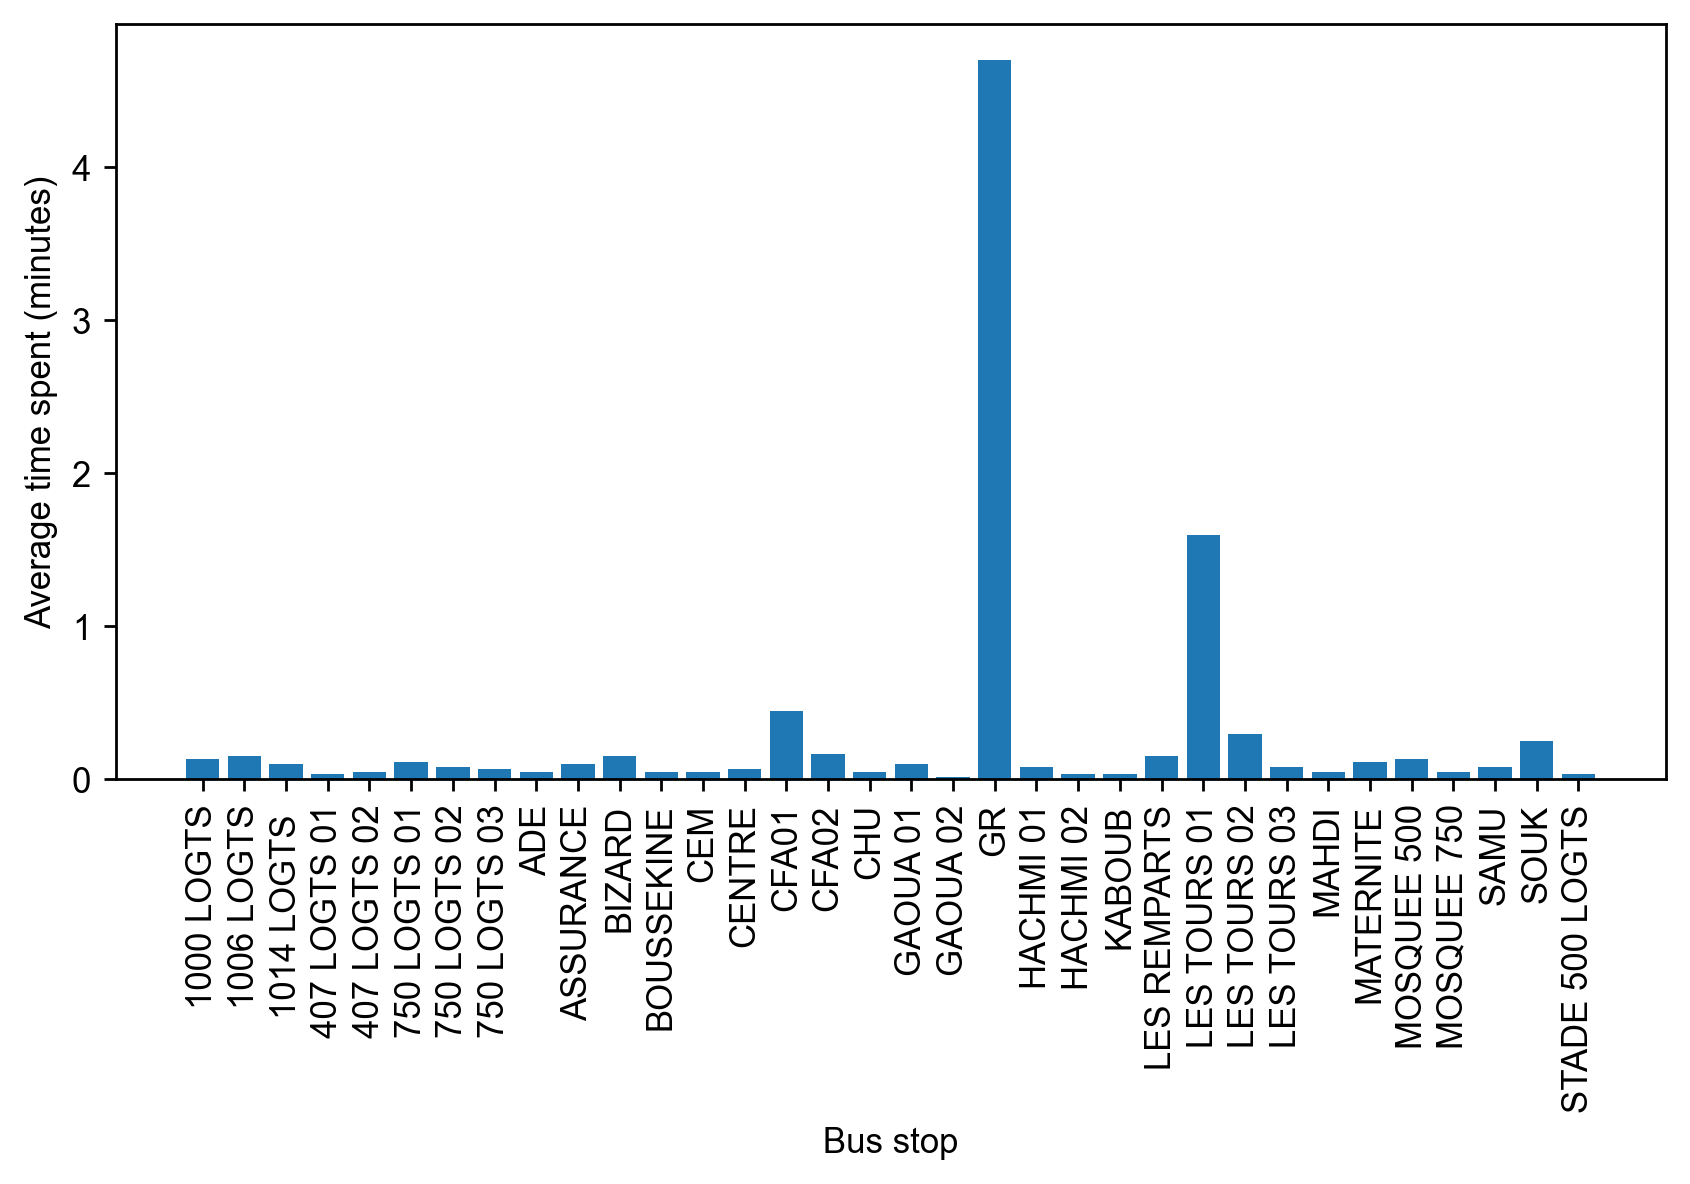

In [35]:
# Calculate the time spent at each stop
import seaborn as sns
arriveinfo['time_spent'] = pd.to_datetime(arriveinfo['leavetime']) - pd.to_datetime(arriveinfo['arrivetime'])

# Group the data by stopname and calculate the average time spent at each stop
stop_data = arriveinfo.groupby('stopname')['time_spent'].mean().reset_index()
plt.figure(1,(8,4),dpi = 250)
# Plot the data
plt.bar(stop_data['stopname'], stop_data['time_spent'].dt.seconds/60)
plt.xticks(rotation=90)
plt.ylabel('Average time spent (minutes)')
plt.xlabel('Bus stop')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.show()


In [36]:
onewaytime = tbd.busgps_onewaytime(arriveinfo,
                                   start = 'GR',
                                   end = 'LES TOURS 01',col = ['VehicleId','stopname', 'arrivetime', 'leavetime'])

In [37]:
onewaytime

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction
0,2023-02-01 07:19:09,GR,0,2023-02-01 08:11:39,LES TOURS 01,0.0,3150.0,7,GR-LES TOURS 01
3,2023-02-01 09:21:52,GR,0,2023-02-01 10:18:02,LES TOURS 01,0.0,3370.0,9,GR-LES TOURS 01
4,2023-02-01 11:37:31,GR,0,2023-02-01 12:38:01,LES TOURS 01,0.0,3630.0,11,GR-LES TOURS 01
6,2023-02-01 13:54:25,GR,0,2023-02-01 14:53:12,LES TOURS 01,0.0,3527.0,13,GR-LES TOURS 01
7,2023-02-01 16:29:09,GR,0,2023-02-01 17:34:14,LES TOURS 01,0.0,3905.0,16,GR-LES TOURS 01
...,...,...,...,...,...,...,...,...,...
9,2023-03-29 16:48:19,LES TOURS 01,455,2023-03-29 17:43:28,GR,455.0,3309.0,16,LES TOURS 01-GR
0,2023-03-30 07:59:18,LES TOURS 01,456,2023-03-30 08:46:24,GR,456.0,2826.0,7,LES TOURS 01-GR
3,2023-03-30 09:46:18,LES TOURS 01,456,2023-03-30 10:42:51,GR,456.0,3393.0,9,LES TOURS 01-GR
4,2023-03-30 11:48:03,LES TOURS 01,456,2023-03-30 12:51:20,GR,456.0,3797.0,11,LES TOURS 01-GR


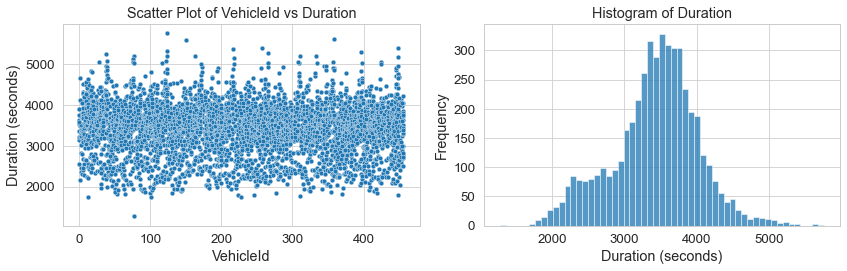

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplot 1 - Scatter plot of VehicleId vs Duration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
sns.scatterplot(data=onewaytime, x="VehicleId", y="duration", ax=ax1)
ax1.set_title('Scatter Plot of VehicleId vs Duration')
ax1.set_xlabel('VehicleId')
ax1.set_ylabel('Duration (seconds)')

# Subplot 2 - Histogram of Duration
sns.histplot(onewaytime['duration'], ax=ax2)
ax2.set_title('Histogram of Duration')
ax2.set_xlabel('Duration (seconds)')
ax2.set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
onewaytime[onewaytime.VehicleId==10]

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction
0,2023-02-14 08:23:29,GR,10,2023-02-14 09:18:05,LES TOURS 01,10.0,3276.0,8,GR-LES TOURS 01
1,2023-02-14 10:23:34,GR,10,2023-02-14 11:24:20,LES TOURS 01,10.0,3646.0,10,GR-LES TOURS 01
3,2023-02-14 12:34:25,GR,10,2023-02-14 13:41:51,LES TOURS 01,10.0,4046.0,12,GR-LES TOURS 01
5,2023-02-14 14:48:40,GR,10,2023-02-14 15:59:11,LES TOURS 01,10.0,4231.0,14,GR-LES TOURS 01
6,2023-02-14 17:19:23,GR,10,2023-02-14 18:19:21,LES TOURS 01,10.0,3598.0,17,GR-LES TOURS 01
0,2023-02-14 07:27:52,LES TOURS 01,10,2023-02-14 08:18:40,GR,10.0,3048.0,7,LES TOURS 01-GR
1,2023-02-14 09:23:06,LES TOURS 01,10,2023-02-14 10:16:40,GR,10.0,3214.0,9,LES TOURS 01-GR
4,2023-02-14 11:30:26,LES TOURS 01,10,2023-02-14 12:32:06,GR,10.0,3700.0,11,LES TOURS 01-GR
5,2023-02-14 13:46:11,LES TOURS 01,10,2023-02-14 14:48:05,GR,10.0,3714.0,13,LES TOURS 01-GR
8,2023-02-14 16:04:26,LES TOURS 01,10,2023-02-14 17:12:33,GR,10.0,4087.0,16,LES TOURS 01-GR


In [40]:
#when leaving service or entering service gps is kept on , so we need to get rid of them
dropindex=onewaytime[onewaytime.duration <= 1000]
droplist=[[d, a, v] for d, a,v in zip (dropindex["time"],dropindex["time1"],dropindex["VehicleId"])]
#for i in droplist:
 #   data.drop(data.loc[(data['GPSDateTime'] >=pd.to_datetime(i[0])) & (data['GPSDateTime'] <= pd.to_datetime(i[1]))& (data['VehicleId'] == i[2])].index,inplace=True,axis=0)

<AxesSubplot:>

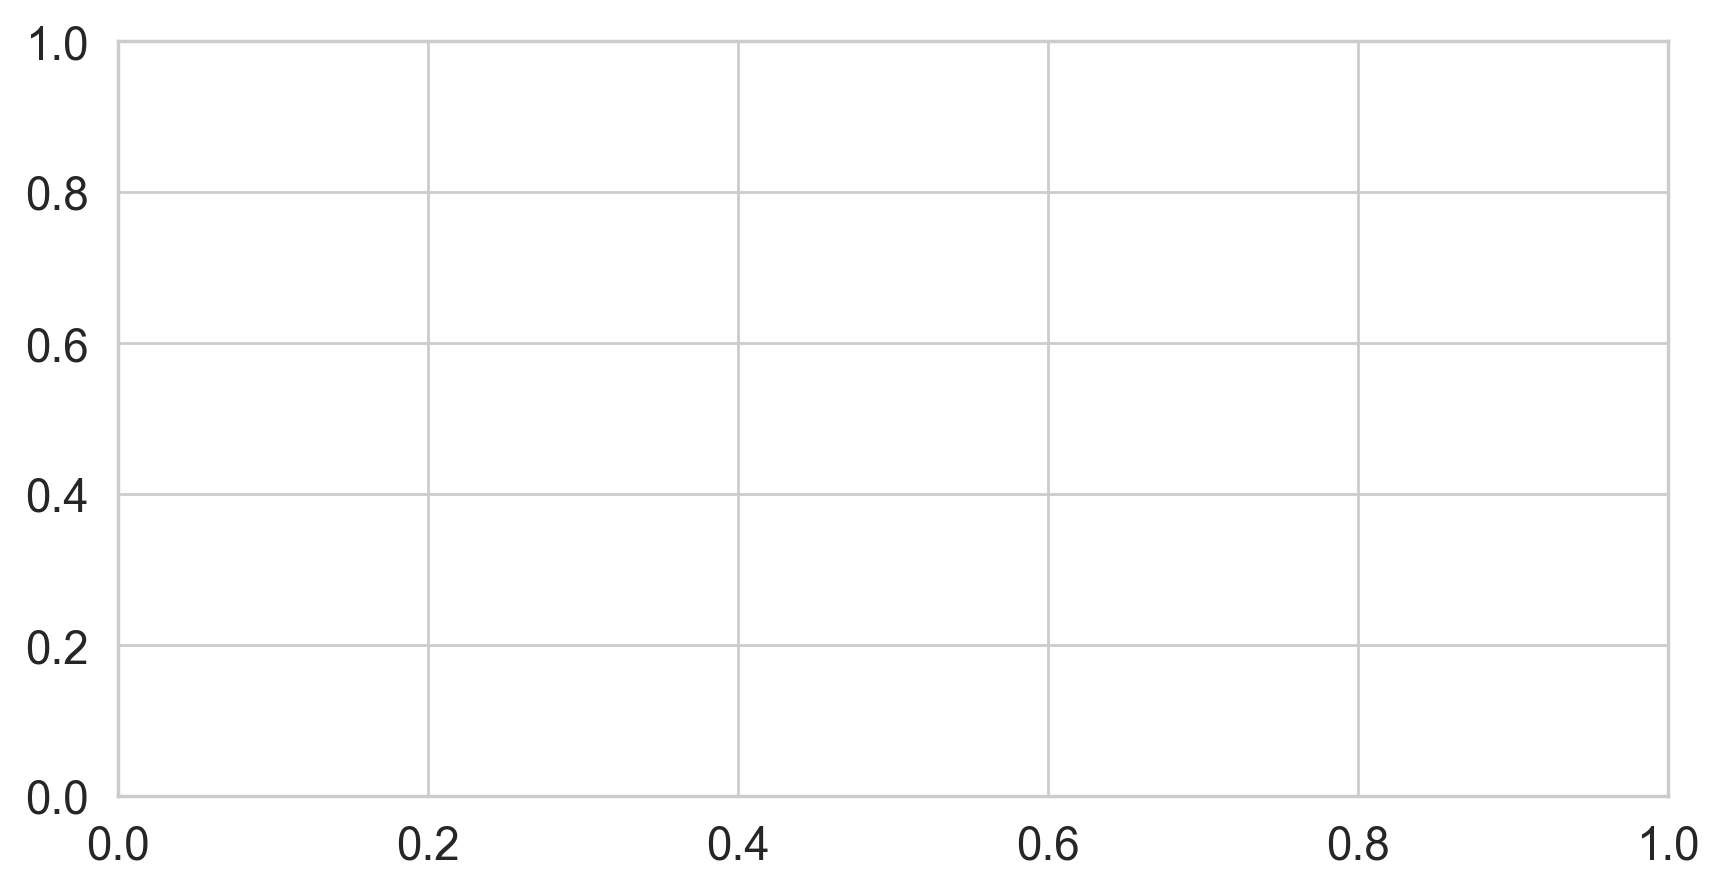

In [41]:
# plotting scatter plot for vehicleID vs TRAVELTIME for route 101
## Draw box plot for one-way travel time
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
fig= plt.figure(1,(8,4),dpi = 250)
sns.scatterplot(data=dropindex, x="shour", y="duration")


<AxesSubplot:xlabel='duration'>

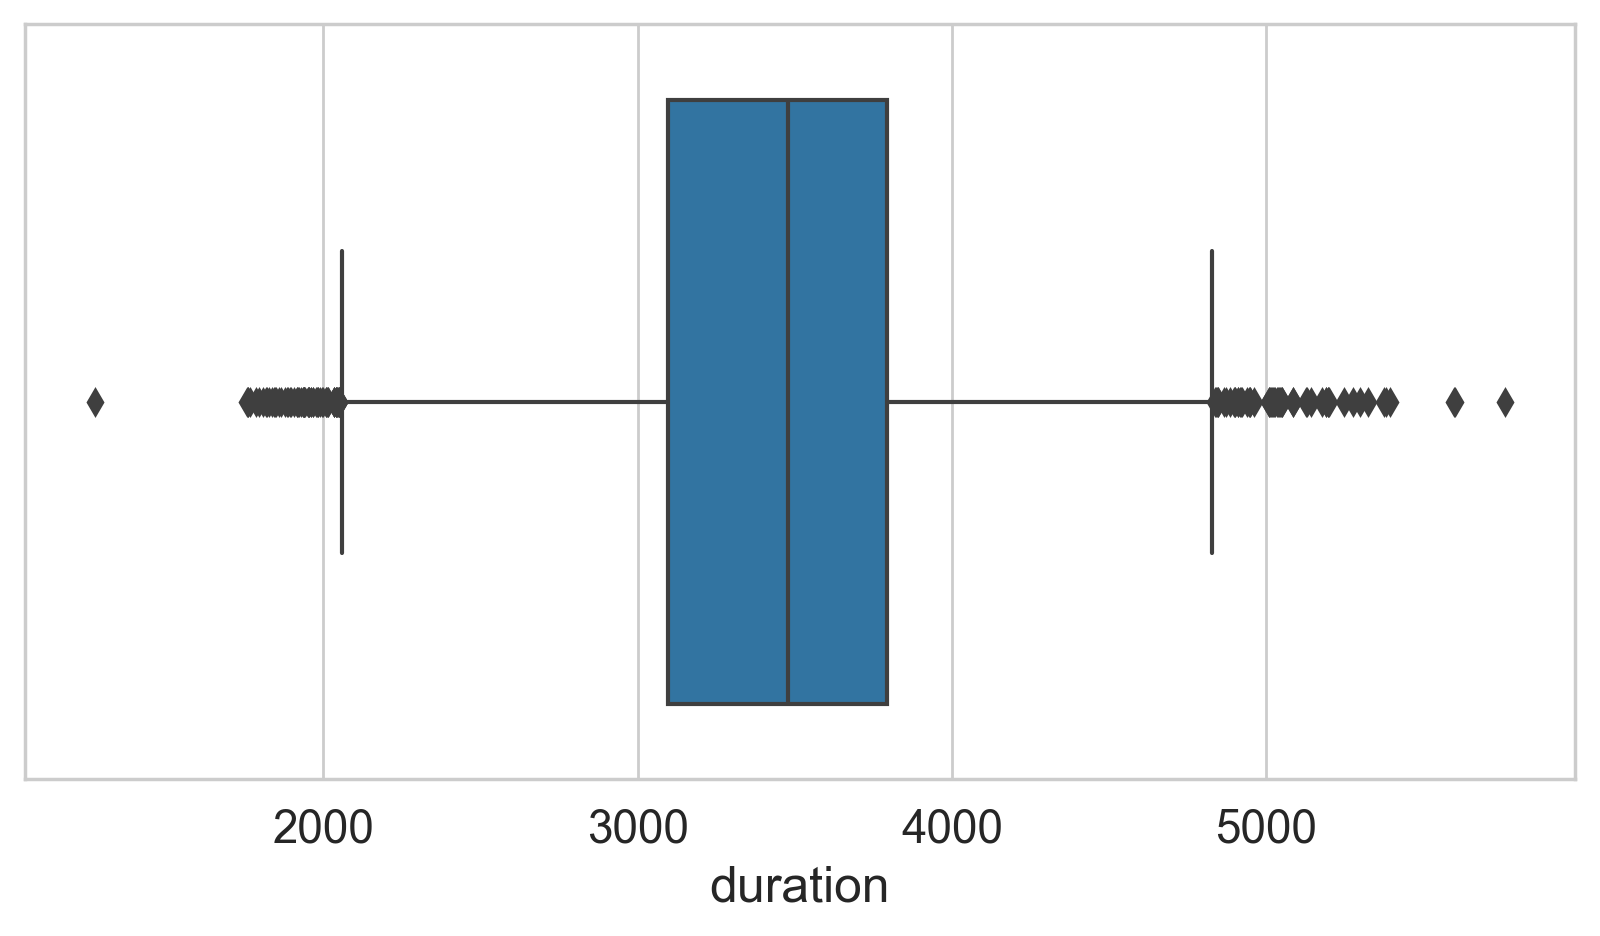

In [42]:
fig= plt.figure(1,(8,4),dpi = 250)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
sns.boxplot(x=onewaytime['duration'])

In [43]:
q1 = onewaytime['duration'].quantile(0.20)
q3 = onewaytime['duration'].quantile(0.80)
iqr = q3 - q1

onewaytime = onewaytime[(onewaytime['duration'] > q1 - 1.5*iqr) & (onewaytime['duration'] < q3 + 1.5*iqr)]


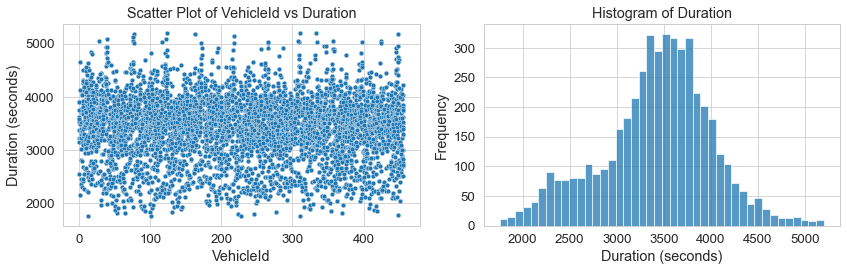

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplot 1 - Scatter plot of VehicleId vs Duration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=onewaytime, x="VehicleId", y="duration", ax=ax1)
ax1.set_title('Scatter Plot of VehicleId vs Duration')
ax1.set_xlabel('VehicleId')
ax1.set_ylabel('Duration (seconds)')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
# Subplot 2 - Histogram of Duration
sns.histplot(onewaytime['duration'], ax=ax2)
ax2.set_title('Histogram of Duration')
ax2.set_xlabel('Duration (seconds)')
ax2.set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
onewaytime

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction
0,2023-02-01 07:19:09,GR,0,2023-02-01 08:11:39,LES TOURS 01,0.0,3150.0,7,GR-LES TOURS 01
3,2023-02-01 09:21:52,GR,0,2023-02-01 10:18:02,LES TOURS 01,0.0,3370.0,9,GR-LES TOURS 01
4,2023-02-01 11:37:31,GR,0,2023-02-01 12:38:01,LES TOURS 01,0.0,3630.0,11,GR-LES TOURS 01
6,2023-02-01 13:54:25,GR,0,2023-02-01 14:53:12,LES TOURS 01,0.0,3527.0,13,GR-LES TOURS 01
7,2023-02-01 16:29:09,GR,0,2023-02-01 17:34:14,LES TOURS 01,0.0,3905.0,16,GR-LES TOURS 01
...,...,...,...,...,...,...,...,...,...
9,2023-03-29 16:48:19,LES TOURS 01,455,2023-03-29 17:43:28,GR,455.0,3309.0,16,LES TOURS 01-GR
0,2023-03-30 07:59:18,LES TOURS 01,456,2023-03-30 08:46:24,GR,456.0,2826.0,7,LES TOURS 01-GR
3,2023-03-30 09:46:18,LES TOURS 01,456,2023-03-30 10:42:51,GR,456.0,3393.0,9,LES TOURS 01-GR
4,2023-03-30 11:48:03,LES TOURS 01,456,2023-03-30 12:51:20,GR,456.0,3797.0,11,LES TOURS 01-GR


In [46]:
# Select the row with the longest duration
longest_duration = onewaytime.nlargest(1, 'duration')

# Select the row with the shortest duration
shortest_duration = onewaytime.nsmallest(1, 'duration')


In [47]:
longest_duration

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction
8,2023-03-22 16:02:32,LES TOURS 01,310,2023-03-22 17:29:11,GR,310.0,5199.0,16,LES TOURS 01-GR


In [48]:
shortest_duration

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction
0,2023-02-04 06:02:59,LES TOURS 01,228,2023-02-04 06:32:16,GR,228.0,1757.0,6,LES TOURS 01-GR


In [ ]:
# set the start and end times
'''start_time = pd.to_datetime('2023-02-21 15:49:34')
end_time = pd.to_datetime('2023-02-21 17:09:45	')
# filter rows that are between the start and end times
filtered_df = data[(data['GPSDateTime'] >= start_time) & (data['GPSDateTime'] <= end_time) & (data['VehicleId'] == 13)]

'''# set the start and end times
start_time = pd.to_datetime('2023-02-21 06:03:07')
end_time = pd.to_datetime('2023-02-21 06:31:37')
# filter rows that are between the start and end times
filtered_df = data[(data['GPSDateTime'] >= start_time) & (data['GPSDateTime'] <= end_time) & (data['VehicleId'] == 47)]

filtered_df
from keplergl import KeplerGl

# Read GPS data from CSV file
df = data

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=filtered_df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
map

In [49]:
# set the start and end times
start_time = pd.to_datetime('2023-02-18 00:00:00')
end_time = pd.to_datetime('2023-02-18 23:59:59')
# filter rows that are between the start and end times
filtered_df = data[(data['GPSDateTime'] >= start_time) & (data['GPSDateTime'] <= end_time)]
#& (data['VehicleId'] == 38)
#filtered_df

from keplergl import KeplerGl

# Read GPS data from CSV file
df = filtered_df

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
#map

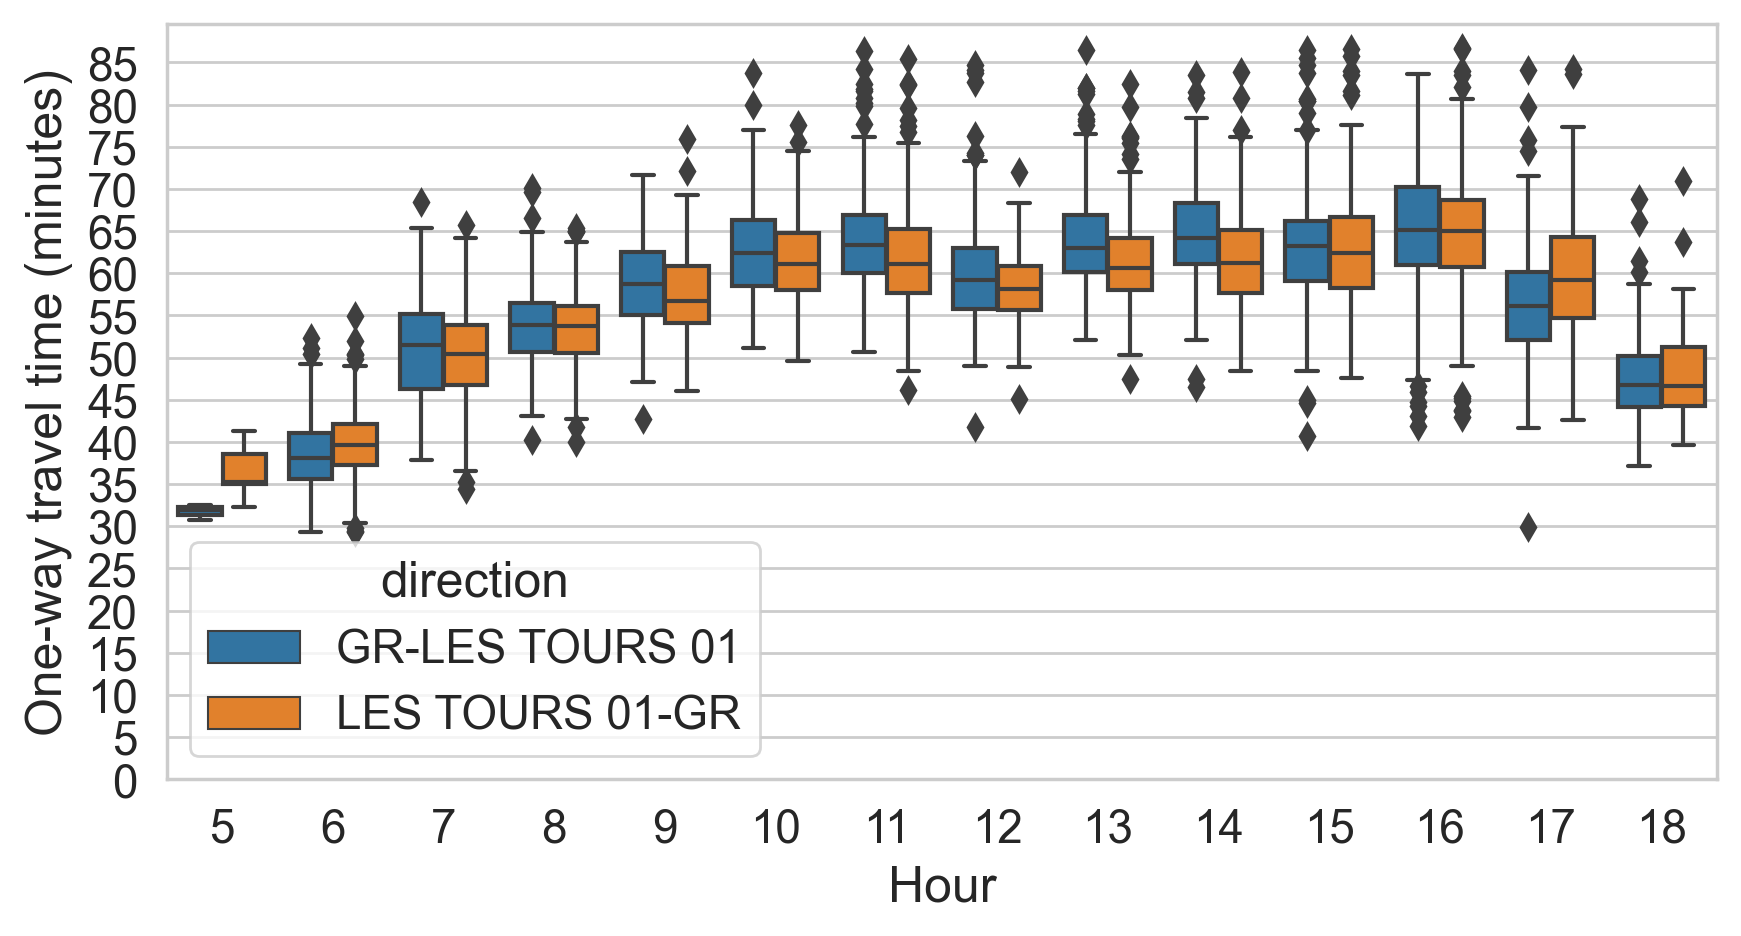

In [50]:
import matplotlib.ticker as ticker
fig = plt.figure(1, figsize=(8, 4), dpi=250)
ax1 = plt.subplot(111)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

sns.boxplot(x='shour', y=onewaytime['duration']/60, hue='direction', data=onewaytime)

# Set y-axis tick locator to show every 5 minutes
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.ylabel('One-way travel time (minutes)')
plt.xlabel('Hour')
plt.ylim(0)
plt.show()

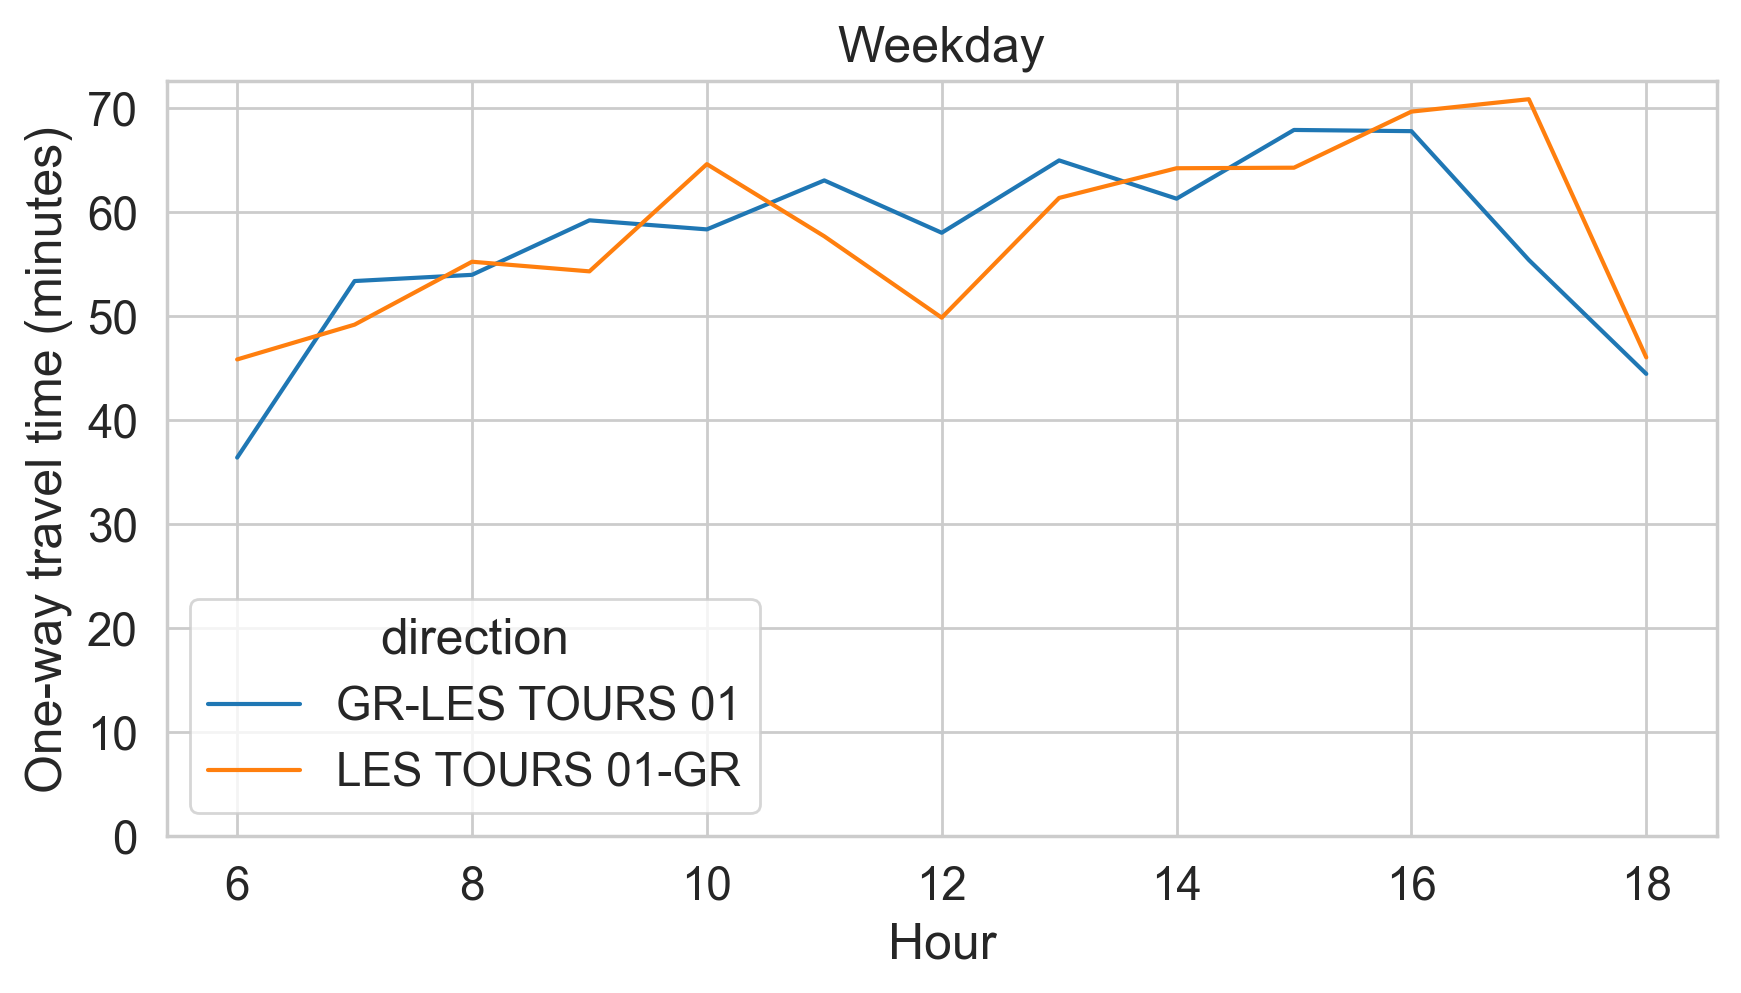

In [51]:
fig = plt.figure(1, (8, 4), dpi=250)
ax1 = plt.subplot(111)
ax1.grid(True)
onewaytime_feb18 = onewaytime[(onewaytime['time'] >= '2023-02-13 00:00:00') & (onewaytime['time'] < '2023-02-14 00:00:00')]

grouped_data = onewaytime_feb18.groupby(['shour', 'direction']).agg({'duration': 'mean'}).reset_index()

sns.lineplot(x='shour', y=grouped_data['duration'] / 60, hue='direction', data=grouped_data)

plt.ylabel('One-way travel time (minutes)')
plt.xlabel('Hour')
plt.title("Weekday")
plt.ylim(0)
plt.show()


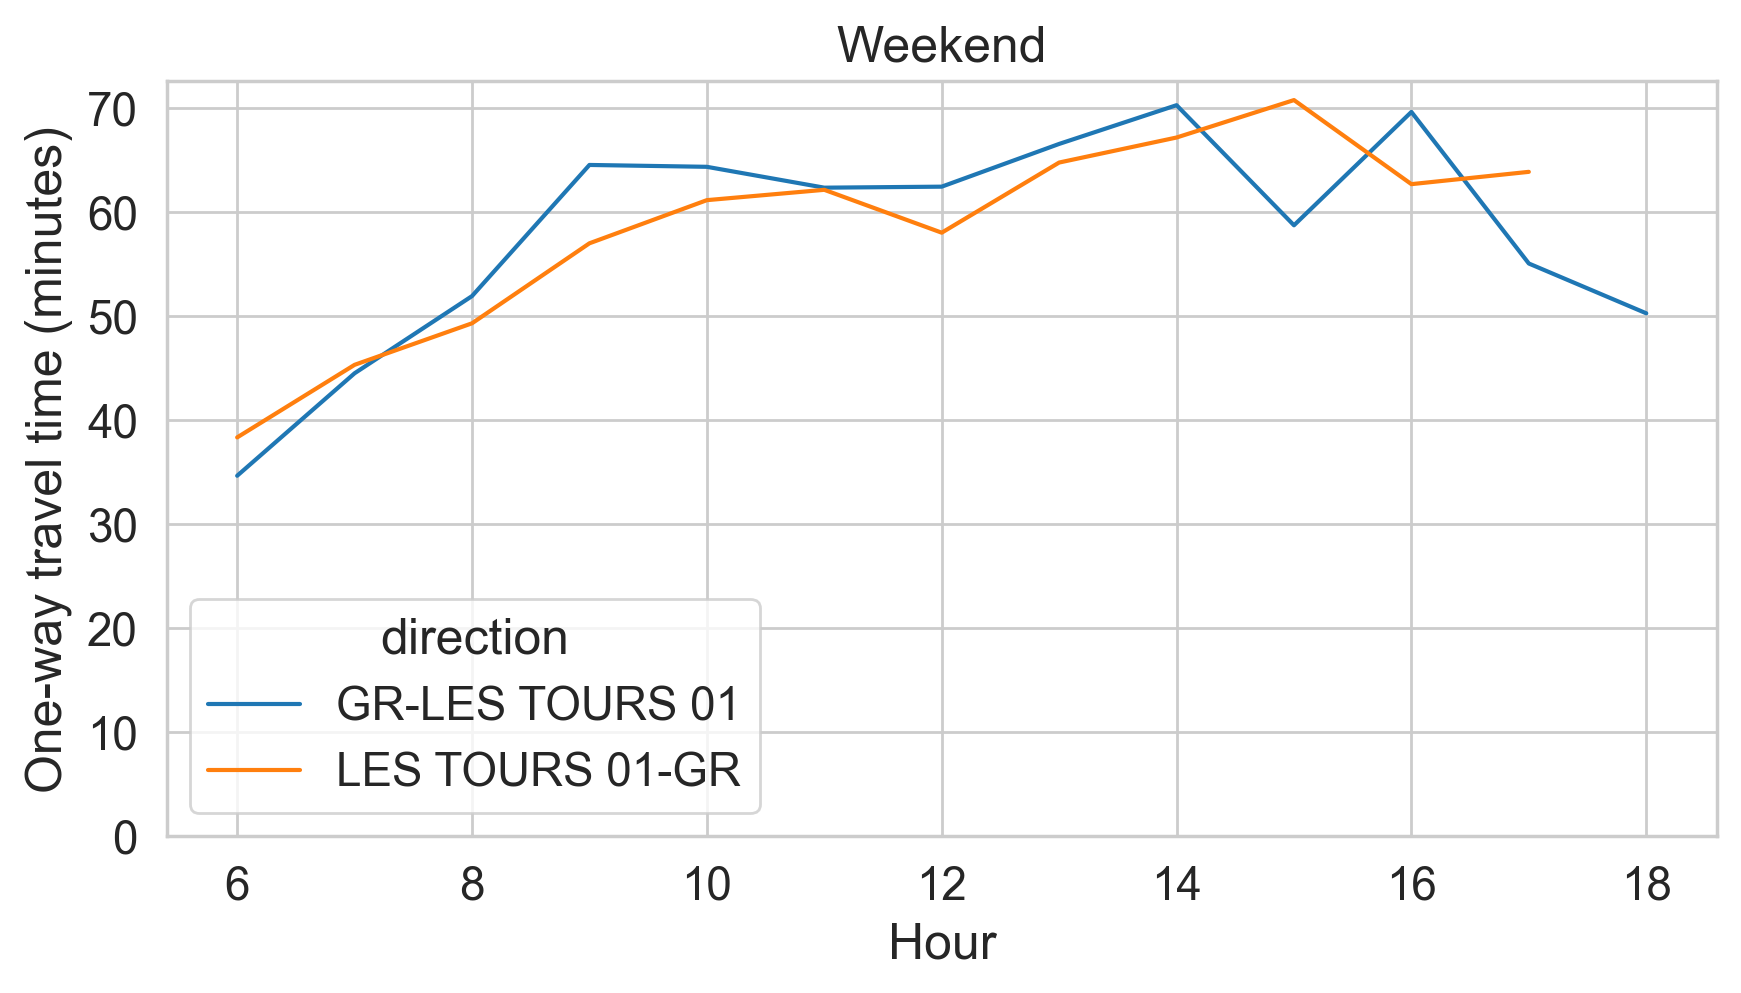

In [52]:
fig = plt.figure(1, (8, 4), dpi=250)
ax1 = plt.subplot(111)
ax1.grid(True)
onewaytime_feb18 = onewaytime[(onewaytime['time'] >= '2023-02-18 06:00:00') & (onewaytime['time'] < '2023-02-19 00:00:00')]

grouped_data = onewaytime_feb18.groupby(['shour', 'direction']).agg({'duration': 'mean'}).reset_index()

sns.lineplot(x='shour', y=grouped_data['duration'] / 60, hue='direction', data=grouped_data)

plt.ylabel('One-way travel time (minutes)')
plt.xlabel('Hour')
plt.ylim(0)
plt.title("Weekend")
plt.show()


In [53]:
data['weekday'] = data['GPSDateTime'].dt.day_of_week

In [54]:
#apparently no data on friday, which is a weeknd 
data.weekday.unique()

array([2, 3, 6, 0, 1, 5])

In [55]:
onewaytime

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction
0,2023-02-01 07:19:09,GR,0,2023-02-01 08:11:39,LES TOURS 01,0.0,3150.0,7,GR-LES TOURS 01
3,2023-02-01 09:21:52,GR,0,2023-02-01 10:18:02,LES TOURS 01,0.0,3370.0,9,GR-LES TOURS 01
4,2023-02-01 11:37:31,GR,0,2023-02-01 12:38:01,LES TOURS 01,0.0,3630.0,11,GR-LES TOURS 01
6,2023-02-01 13:54:25,GR,0,2023-02-01 14:53:12,LES TOURS 01,0.0,3527.0,13,GR-LES TOURS 01
7,2023-02-01 16:29:09,GR,0,2023-02-01 17:34:14,LES TOURS 01,0.0,3905.0,16,GR-LES TOURS 01
...,...,...,...,...,...,...,...,...,...
9,2023-03-29 16:48:19,LES TOURS 01,455,2023-03-29 17:43:28,GR,455.0,3309.0,16,LES TOURS 01-GR
0,2023-03-30 07:59:18,LES TOURS 01,456,2023-03-30 08:46:24,GR,456.0,2826.0,7,LES TOURS 01-GR
3,2023-03-30 09:46:18,LES TOURS 01,456,2023-03-30 10:42:51,GR,456.0,3393.0,9,LES TOURS 01-GR
4,2023-03-30 11:48:03,LES TOURS 01,456,2023-03-30 12:51:20,GR,456.0,3797.0,11,LES TOURS 01-GR


In [56]:
onewaytimealler=onewaytime[onewaytime['direction']=="GR-LES TOURS 01"]
# convert time column to datetime format
onewaytimealler['time'] = pd.to_datetime(onewaytimealler['time'])

# sort dataframe by time
onewaytimealler = onewaytimealler.sort_values(by='time')

In [57]:

# calculate time difference between consecutive rows
onewaytimealler['timediff'] = onewaytimealler['time'].diff()

# calculate average time difference
avg_timediff = onewaytimealler['timediff'].mean()

print('Average time difference:', avg_timediff)


Average time difference: 0 days 00:33:28.082524271


In [58]:
onewaytimeretour=onewaytime[onewaytime['direction']=="LES TOURS 01-GR"]
# convert time column to datetime format
onewaytimeretour['time'] = pd.to_datetime(onewaytimeretour['time'])

# sort dataframe by time
onewaytimeretour = onewaytimeretour.sort_values(by='time')


In [59]:

# calculate time difference between consecutive rows
onewaytimeretour['timediff'] = onewaytimeretour['time'].diff()

# calculate average time difference
avg_timediff = onewaytimeretour['timediff'].mean()

print('Average time difference:', avg_timediff)


Average time difference: 0 days 00:35:07.893797790


In [60]:
onewaytimealler

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,timediff
0,2023-02-01 06:08:51,GR,131,2023-02-01 06:39:33,LES TOURS 01,131.0,1842.0,6,GR-LES TOURS 01,NaT
0,2023-02-01 06:13:58,GR,406,2023-02-01 06:55:52,LES TOURS 01,406.0,2514.0,6,GR-LES TOURS 01,0 days 00:05:07
0,2023-02-01 06:22:47,GR,314,2023-02-01 06:59:58,LES TOURS 01,314.0,2231.0,6,GR-LES TOURS 01,0 days 00:08:49
1,2023-02-01 06:33:57,GR,269,2023-02-01 07:11:36,LES TOURS 01,269.0,2259.0,6,GR-LES TOURS 01,0 days 00:11:10
0,2023-02-01 06:44:53,GR,176,2023-02-01 07:26:51,LES TOURS 01,176.0,2518.0,6,GR-LES TOURS 01,0 days 00:10:56
...,...,...,...,...,...,...,...,...,...,...
9,2023-03-30 15:46:12,GR,365,2023-03-30 16:35:44,LES TOURS 01,365.0,2972.0,15,GR-LES TOURS 01,0 days 00:15:48
9,2023-03-30 15:59:40,GR,225,2023-03-30 16:50:05,LES TOURS 01,225.0,3025.0,15,GR-LES TOURS 01,0 days 00:13:28
9,2023-03-30 16:42:46,GR,405,2023-03-30 17:27:04,LES TOURS 01,405.0,2658.0,16,GR-LES TOURS 01,0 days 00:43:06
10,2023-03-30 16:50:47,GR,46,2023-03-30 17:37:26,LES TOURS 01,46.0,2799.0,16,GR-LES TOURS 01,0 days 00:08:01


In [61]:
onewaytimeretour

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,timediff
0,2023-02-01 06:00:53,LES TOURS 01,366,2023-02-01 06:38:19,GR,366.0,2246.0,6,LES TOURS 01-GR,NaT
0,2023-02-01 06:19:02,LES TOURS 01,226,2023-02-01 07:00:53,GR,226.0,2511.0,6,LES TOURS 01-GR,0 days 00:18:09
0,2023-02-01 06:28:36,LES TOURS 01,0,2023-02-01 07:11:03,GR,0.0,2547.0,6,LES TOURS 01-GR,0 days 00:09:34
0,2023-02-01 06:38:43,LES TOURS 01,84,2023-02-01 07:17:32,GR,84.0,2329.0,6,LES TOURS 01-GR,0 days 00:10:07
1,2023-02-01 06:49:57,LES TOURS 01,131,2023-02-01 07:33:05,GR,131.0,2588.0,6,LES TOURS 01-GR,0 days 00:11:14
...,...,...,...,...,...,...,...,...,...,...
6,2023-03-30 14:42:45,LES TOURS 01,225,2023-03-30 15:46:29,GR,225.0,3824.0,14,LES TOURS 01-GR,0 days 00:19:39
8,2023-03-30 15:13:29,LES TOURS 01,405,2023-03-30 16:20:14,GR,405.0,4005.0,15,LES TOURS 01-GR,0 days 00:30:44
9,2023-03-30 15:29:19,LES TOURS 01,46,2023-03-30 16:26:26,GR,46.0,3427.0,15,LES TOURS 01-GR,0 days 00:15:50
10,2023-03-30 15:49:01,LES TOURS 01,130,2023-03-30 16:43:47,GR,130.0,3286.0,15,LES TOURS 01-GR,0 days 00:19:42


In [62]:

# filter the data for Feb 1
feb1_data = onewaytimeretour[(onewaytimeretour['time'] >= '2023-02-01 00:00:00') & (onewaytimeretour['time'] < '2023-02-02 00:00:00')]
feb1_data.shape



(47, 10)

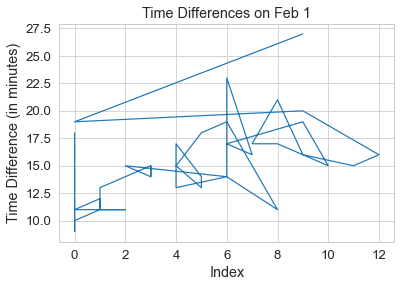

In [63]:
# plot the time differences
plt.plot(feb1_data['timediff'].astype('timedelta64[m]'))
plt.title('Time Differences on Feb 1')
plt.xlabel('Index')
plt.ylabel('Time Difference (in minutes)')
plt.show()

In [64]:
onewaytime['weekday'] = onewaytime['time'].dt.day_of_week
onewaytime['smin'] = onewaytime['time'].dt.minute
onewaytime['date'] = onewaytime['time'].dt.date
onewaytime['time'] = onewaytime['time'].dt.time
onewaytime['time1'] = onewaytime['time1'].dt.time


In [65]:
# Create categorical feature for time of day
onewaytime["time_of_day"] = pd.cut(onewaytime["shour"], bins=[0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])

In [66]:
onewaytime

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,weekday,smin,date,time_of_day
0,07:19:09,GR,0,08:11:39,LES TOURS 01,0.0,3150.0,7,GR-LES TOURS 01,2,19,2023-02-01,Morning
3,09:21:52,GR,0,10:18:02,LES TOURS 01,0.0,3370.0,9,GR-LES TOURS 01,2,21,2023-02-01,Morning
4,11:37:31,GR,0,12:38:01,LES TOURS 01,0.0,3630.0,11,GR-LES TOURS 01,2,37,2023-02-01,Morning
6,13:54:25,GR,0,14:53:12,LES TOURS 01,0.0,3527.0,13,GR-LES TOURS 01,2,54,2023-02-01,Afternoon
7,16:29:09,GR,0,17:34:14,LES TOURS 01,0.0,3905.0,16,GR-LES TOURS 01,2,29,2023-02-01,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,16:48:19,LES TOURS 01,455,17:43:28,GR,455.0,3309.0,16,LES TOURS 01-GR,2,48,2023-03-29,Afternoon
0,07:59:18,LES TOURS 01,456,08:46:24,GR,456.0,2826.0,7,LES TOURS 01-GR,3,59,2023-03-30,Morning
3,09:46:18,LES TOURS 01,456,10:42:51,GR,456.0,3393.0,9,LES TOURS 01-GR,3,46,2023-03-30,Morning
4,11:48:03,LES TOURS 01,456,12:51:20,GR,456.0,3797.0,11,LES TOURS 01-GR,3,48,2023-03-30,Morning


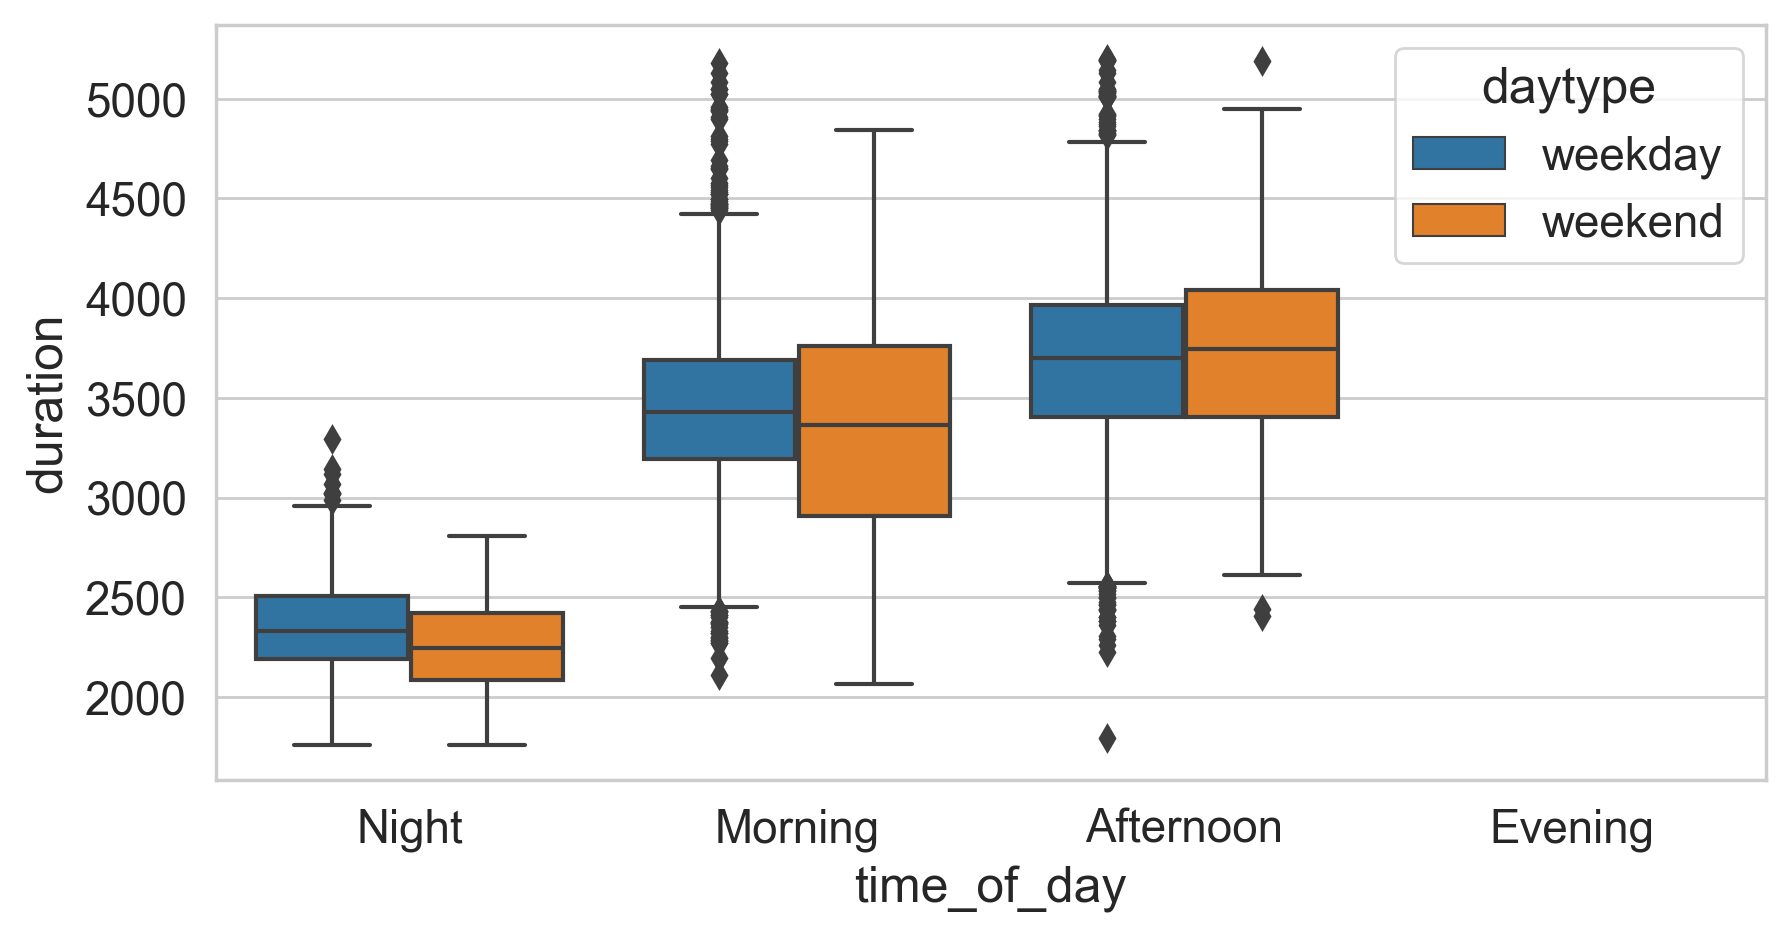

In [67]:
# Extract relevant columns and create new column for time of day
onewaytime["daytype"] = onewaytime["weekday"].apply(lambda x: 'weekend' if x in [4, 5] else 'weekday')
# Create boxplot
fig = plt.figure(1, (8, 4), dpi=250)
sns.boxplot(x="time_of_day", y="duration", hue="daytype", data=onewaytime)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

In [68]:
data

,VehicleId,GPSDateTime,lat,lon,ID,Speed,motion,DistanceGap,totaldistance,geometry,project,time_st,weekday
0,0,2023-02-01 06:27:30,36.184616,5.443572,19001,14.9,true,16.51,744900.63,POINT (34514802.504 13295103.478),16960.894524,1647.0,2
69,0,2023-02-01 06:27:40,36.184968,5.443344,19001,7.3,true,44.2,744944.83,POINT (34514866.421 13295092.219),16896.004273,1657.0,2
367,0,2023-02-01 06:27:50,36.185030,5.443342,19001,0.0,false,6.83,744951.66,POINT (34514874.505 13295086.301),16887.097170,1667.0,2
368,0,2023-02-01 06:28:01,36.185052,5.443341,19001,0.0,false,2.47,744954.13,POINT (34514877.468 13295084.215),16883.846042,1678.0,2
369,0,2023-02-01 06:28:10,36.185069,5.443355,19001,0.0,false,2.25,744956.38,POINT (34514878.577 13295081.105),16882.266100,1687.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899834,456,2023-03-30 17:23:14,36.179451,5.399610,19010,54.6,true,134.25,8988870.8,POINT (34517687.183 13300227.308),2100.119524,4965791.0,3
1853791,456,2023-03-30 17:23:24,36.178953,5.401015,19010,36.3,true,137.88,8989008.68,POINT (34517509.211 13300129.750),2316.434785,4965801.0,3
1773087,456,2023-03-30 17:23:29,36.178841,5.401327,19010,12.4,true,30.7,8989039.38,POINT (34517469.494 13300108.208),2359.338302,4965806.0,3
1773088,456,2023-03-30 17:23:32,36.178750,5.401342,19010,15.1,true,10.17,8989049.55,POINT (34517456.629 13300115.766),2362.647306,4965809.0,3


# Read GPS data from CSV file
df = data

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
#map

start_time = '2023-02-05 07:20:26'
end_time = '2023-02-05 08:06:51'
df_period = df[(df['GPSDateTime'] >= start_time) & (df['GPSDateTime'] <= end_time) & (data['VehicleId'] == 0)]

# Read GPS data from CSV file
df = df_period

# Create a Kepler.gl map
map = KeplerGl(height=600)

# Add GPS data to map
map.add_data(data=df, name='gps_data')
# Configure map settings
map.config = {
    'version': 'v1',
    'config': {
        'mapState': {
            "bearing": 0,
            "dragRotate": True,
            'Latitude': 36.18561833333333,
            'Longitude': 5.3921893333333335,
            "pitch": 0,
            "zoom": 3,
            "isSplit": False
        }
    }
}
# Display map
#map

df=data
df['Speed'] = df['Speed'].astype(float)
# filter rows where speed is less than 5
stops = df[(df['Speed'] <5.0) & (df['GPSDateTime'].between('2023-02-05 07:20:26', '2023-02-05 08:06:51'))]

# calculate time differences between consecutive rows
time_diff = stops['GPSDateTime'].diff()

# identify stops that last longer than 5 minutes
long_stops = stops[time_diff > pd.Timedelta(seconds= 60)]

# calculate total stop time
stop_time = long_stops['GPSDateTime'].diff().sum()

print(f"Total stop time where speed is less than 2: {stop_time}")


In [69]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1927677 entries, 0 to 1927267
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   VehicleId      int64         
 1   GPSDateTime    datetime64[ns]
 2   lat            float64       
 3   lon            float64       
 4   ID             object        
 5   Speed          object        
 6   motion         object        
 7   DistanceGap    object        
 8   totaldistance  object        
 9   geometry       geometry      
 10  project        float64       
 11  time_st        float64       
 12  weekday        int64         
dtypes: datetime64[ns](1), float64(4), geometry(1), int64(2), object(5)
memory usage: 205.9+ MB


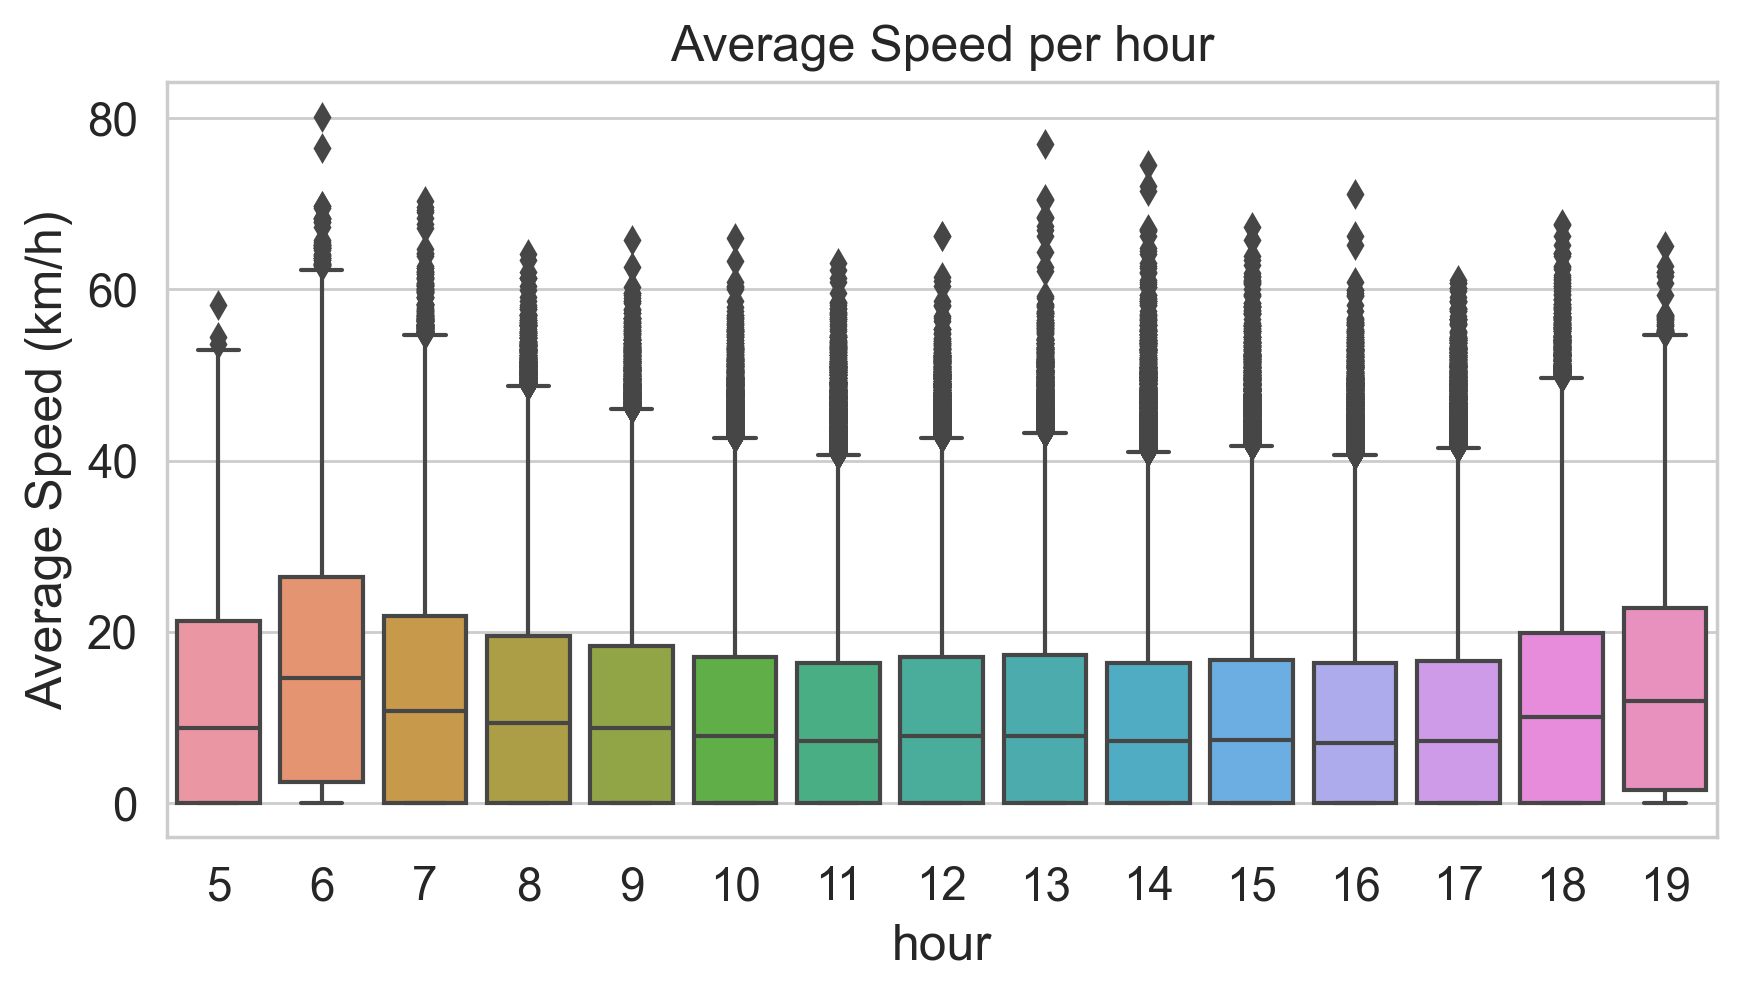

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and the Speed column contains the speed values

# Add a new column 'day' to the dataframe to store the day of the week
data['Speed'] = data['Speed'].astype(float)
data['hour']=data['GPSDateTime'].dt.hour
fig = plt.figure(1, (8, 4), dpi=250)
# Create a boxplot using Seaborn
sns.boxplot(x='hour', y='Speed', data=data)

# Set the plot title and labels
plt.title('Average Speed per hour')
plt.xlabel('hour')
plt.ylabel('Average Speed (km/h)')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
# Show the plot
plt.show()


In [72]:

# Set the start and end times
start_time = pd.Timestamp('2023-02-05 07:20:00')
end_time = pd.Timestamp('2023-02-05 08:06:50')
# Filter the data to include only the rows between start_time and end_time
mask = (data['GPSDateTime'] >= start_time) & (data['GPSDateTime'] <= end_time  )
df_filtered = data.loc[mask]
fig = plt.figure(1, (8, 4), dpi=250)
# Plot the speed against time for each vehicle
unique_vehicles = df_filtered['VehicleId'].unique()
for vehicle_id in unique_vehicles:
    if vehicle_id==0:
        vehicle_data = df_filtered[df_filtered['VehicleId'] == vehicle_id]
        plt.plot(vehicle_data['GPSDateTime'], vehicle_data['Speed'], label='Vehicle {}'.format(vehicle_id))



<Figure size 2000x1000 with 0 Axes>

In [73]:
onewaytime

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,weekday,smin,date,time_of_day,daytype
0,07:19:09,GR,0,08:11:39,LES TOURS 01,0.0,3150.0,7,GR-LES TOURS 01,2,19,2023-02-01,Morning,weekday
3,09:21:52,GR,0,10:18:02,LES TOURS 01,0.0,3370.0,9,GR-LES TOURS 01,2,21,2023-02-01,Morning,weekday
4,11:37:31,GR,0,12:38:01,LES TOURS 01,0.0,3630.0,11,GR-LES TOURS 01,2,37,2023-02-01,Morning,weekday
6,13:54:25,GR,0,14:53:12,LES TOURS 01,0.0,3527.0,13,GR-LES TOURS 01,2,54,2023-02-01,Afternoon,weekday
7,16:29:09,GR,0,17:34:14,LES TOURS 01,0.0,3905.0,16,GR-LES TOURS 01,2,29,2023-02-01,Afternoon,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,16:48:19,LES TOURS 01,455,17:43:28,GR,455.0,3309.0,16,LES TOURS 01-GR,2,48,2023-03-29,Afternoon,weekday
0,07:59:18,LES TOURS 01,456,08:46:24,GR,456.0,2826.0,7,LES TOURS 01-GR,3,59,2023-03-30,Morning,weekday
3,09:46:18,LES TOURS 01,456,10:42:51,GR,456.0,3393.0,9,LES TOURS 01-GR,3,46,2023-03-30,Morning,weekday
4,11:48:03,LES TOURS 01,456,12:51:20,GR,456.0,3797.0,11,LES TOURS 01-GR,3,48,2023-03-30,Morning,weekday


In [74]:
onewaytime.to_csv("../data/processed/onewaytime.csv")

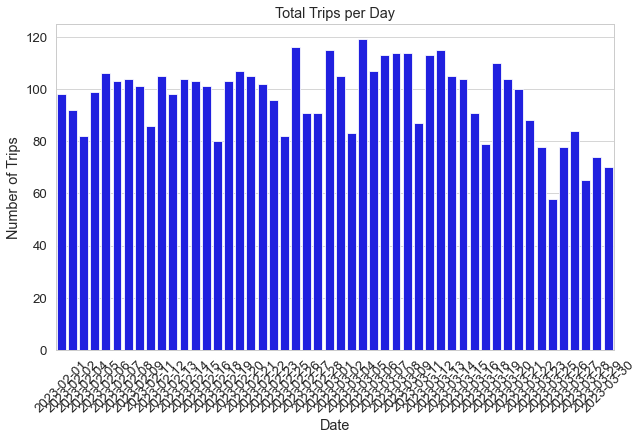

In [75]:

dftrips=onewaytime
# Group the dataframe by date and count the number of trips for each date
trips_per_day = dftrips.groupby('date')['time'].count()

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_day.index, y=trips_per_day.values, color='blue')
plt.title('Total Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


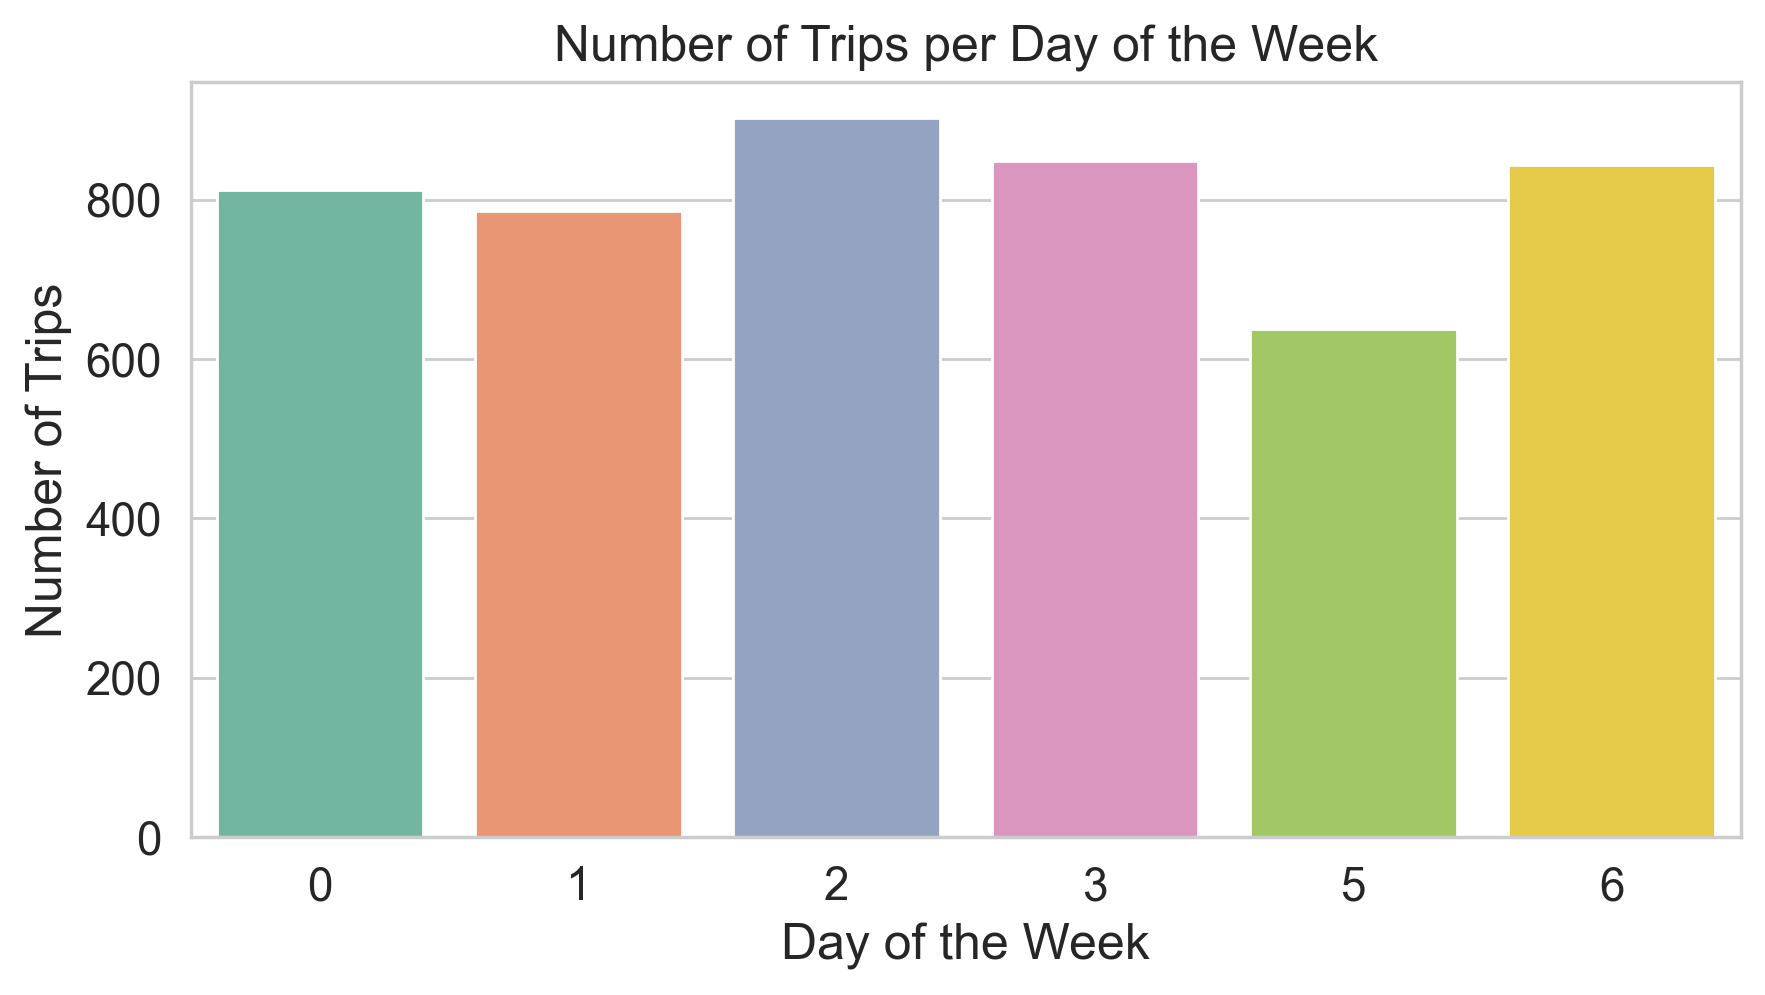

In [76]:

# Group the data by day of the week and calculate the mean number of trips
trips_per_day = dftrips.groupby('weekday')['VehicleId'].count().reset_index(name='trips_mean')
fig = plt.figure(1, (8, 4), dpi=250)
# Plot a bar chart
sns.barplot(x='weekday', y='trips_mean', data=trips_per_day, palette='Set2')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.show()



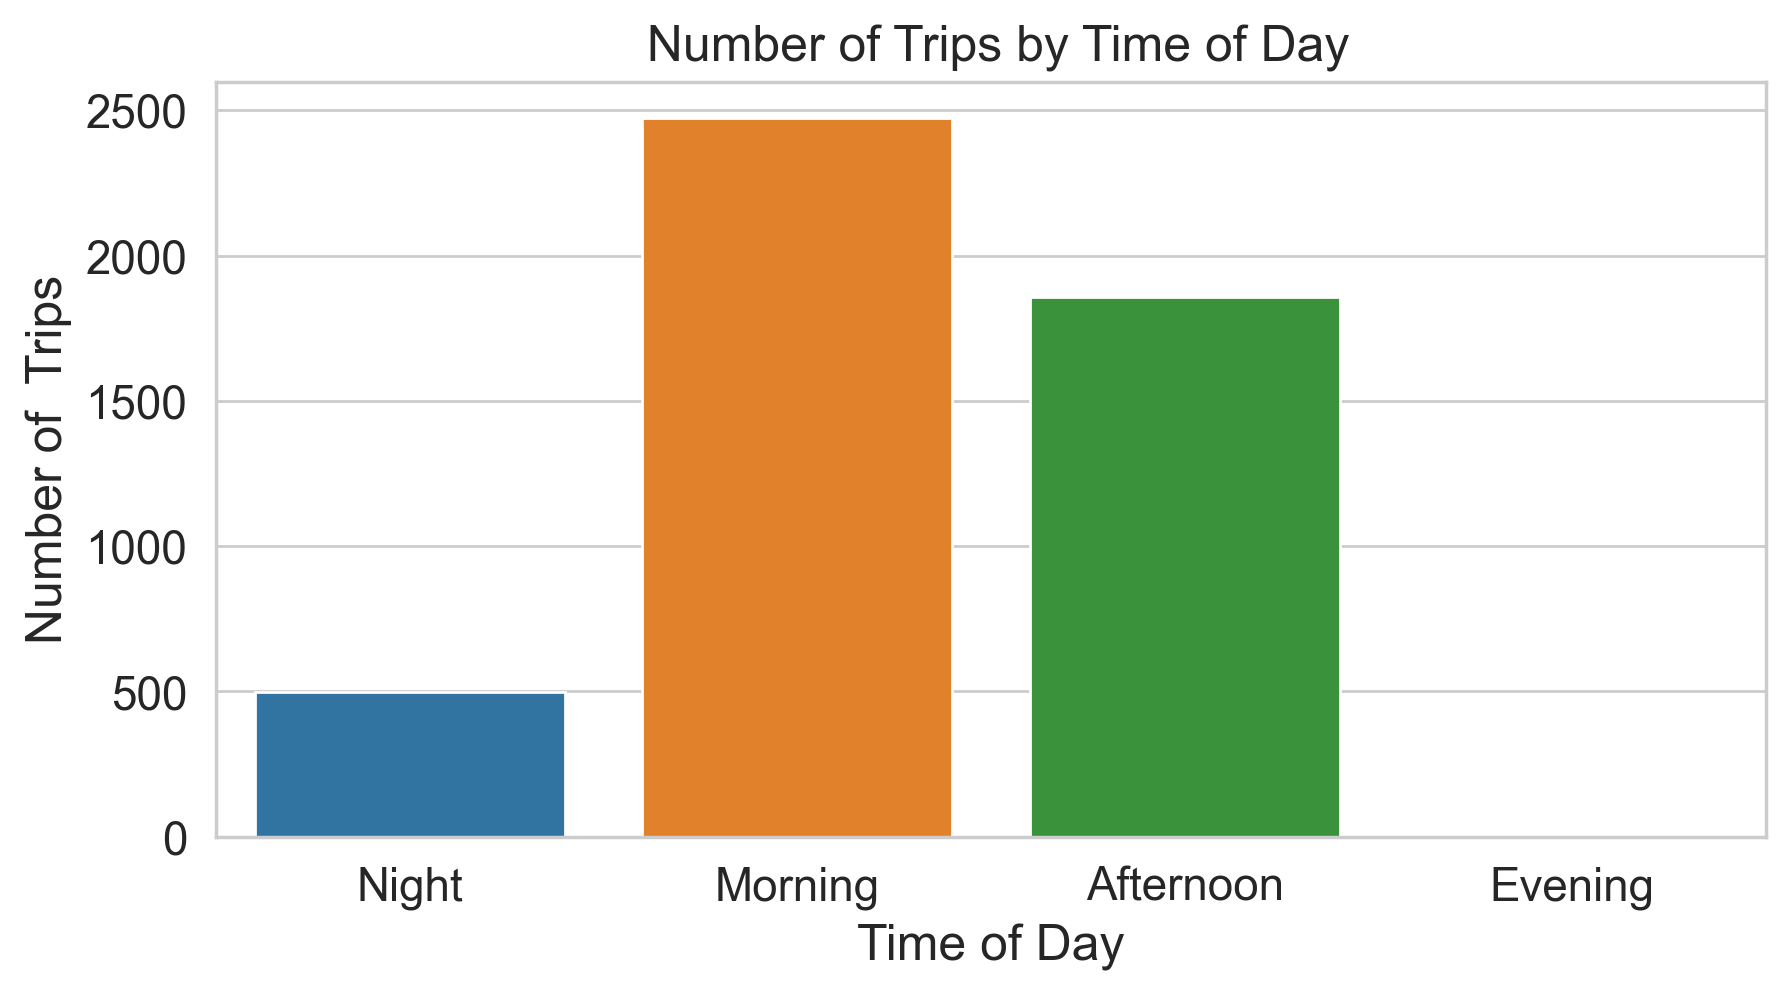

In [77]:
# Group the data by time of day and calculate the average number of trips
avg_trips = dftrips.groupby('time_of_day')['VehicleId'].count().reset_index()
avg_trips = avg_trips.rename(columns={'VehicleId': 'Average Trips'})
fig = plt.figure(1, (8, 4), dpi=250)
# Set the style and context of the plot
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

# Create the bar plot
sns.barplot(x='time_of_day', y='Average Trips', data=avg_trips)

# Set the axis labels and title
plt.xlabel('Time of Day')
plt.ylabel('Number of  Trips')
plt.title(' Number of Trips by Time of Day')

# Show the plot
plt.show()


In [78]:
dftrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828 entries, 0 to 7
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   time         4828 non-null   object  
 1   stopname     4828 non-null   object  
 2   VehicleId    4828 non-null   int64   
 3   time1        4828 non-null   object  
 4   stopname1    4828 non-null   object  
 5   VehicleId1   4828 non-null   float64 
 6   duration     4828 non-null   float64 
 7   shour        4828 non-null   int64   
 8   direction    4828 non-null   object  
 9   weekday      4828 non-null   int64   
 10  smin         4828 non-null   int64   
 11  date         4828 non-null   object  
 12  time_of_day  4828 non-null   category
 13  daytype      4828 non-null   object  
dtypes: category(1), float64(2), int64(4), object(7)
memory usage: 533.0+ KB


Text(0, 0.5, 'Number of buses')

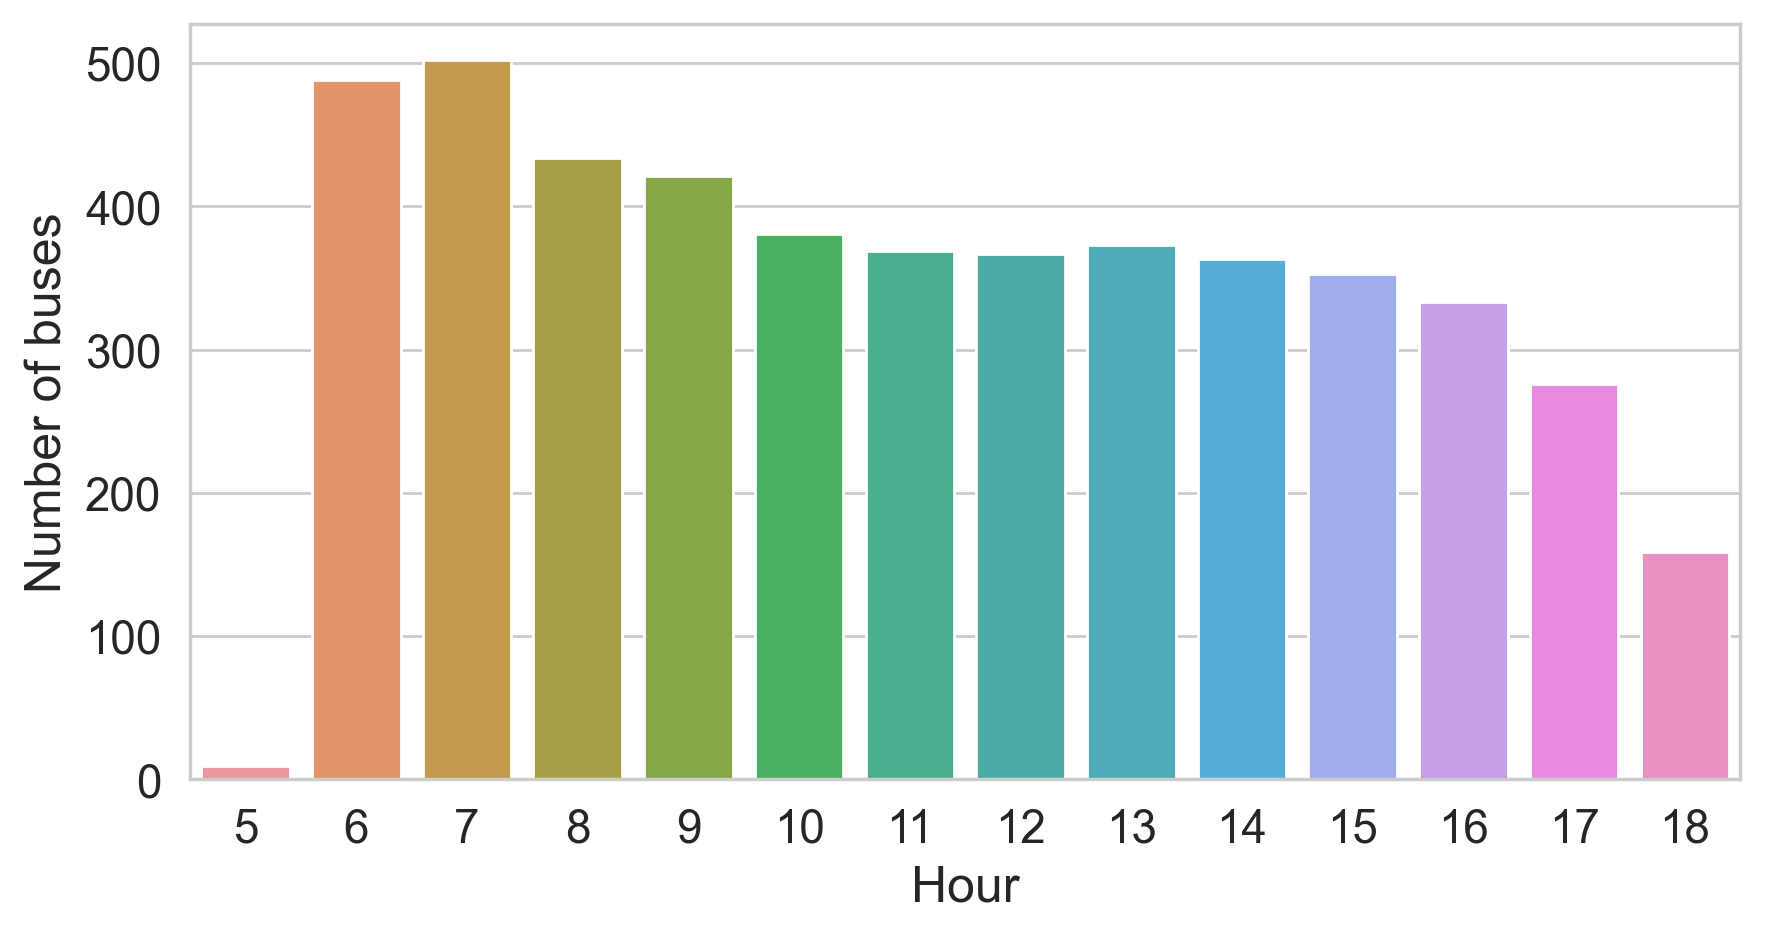

In [79]:

fig = plt.figure(1, (8, 4), dpi=250)
# Set the style and context of the plot
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
# group data by hour and count the number of occurrences
df_hourly = dftrips.groupby('shour')['shour'].count()

# create barplot
sns.barplot(x=df_hourly.index, y=df_hourly.values)
plt.xlabel('Hour')
plt.ylabel('Number of buses')


(1551, 14)


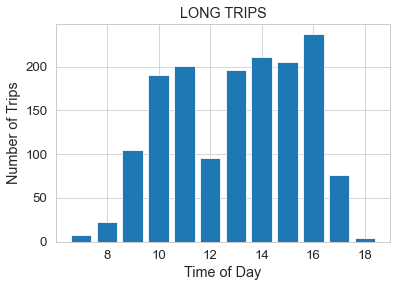

In [80]:

# filter the data to include only trips with duration greater than 3800
long_trips = onewaytime[onewaytime['duration'] > 3700]
print(long_trips.shape)
# group the data by time of day and count the number of trips in each group
trips_by_time = long_trips.groupby('shour')['duration'].count()

# plot a bar chart of the number of trips for each time of day
fig, ax = plt.subplots()
ax.bar(trips_by_time.index, trips_by_time.values)
ax.set_xlabel('Time of Day')
ax.set_ylabel('Number of Trips')
ax.set_title('LONG TRIPS')
plt.show()


In [81]:
# Convert the time component to a float
onewaytime['time'] = onewaytime['time'].apply(lambda x: float(x.strftime('%H.%M%S')))
onewaytime['time1'] = onewaytime['time1'].apply(lambda x: float(x.strftime('%H.%M%S')))


In [82]:
onewaytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828 entries, 0 to 7
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   time         4828 non-null   float64 
 1   stopname     4828 non-null   object  
 2   VehicleId    4828 non-null   int64   
 3   time1        4828 non-null   float64 
 4   stopname1    4828 non-null   object  
 5   VehicleId1   4828 non-null   float64 
 6   duration     4828 non-null   float64 
 7   shour        4828 non-null   int64   
 8   direction    4828 non-null   object  
 9   weekday      4828 non-null   int64   
 10  smin         4828 non-null   int64   
 11  date         4828 non-null   object  
 12  time_of_day  4828 non-null   category
 13  daytype      4828 non-null   object  
dtypes: category(1), float64(4), int64(4), object(5)
memory usage: 533.0+ KB


In [83]:
onewaytime['shour1'] = onewaytime['shour']+1
onewaytime["date"]=pd.to_datetime(onewaytime["date"])
onewaytime.tail()


,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,weekday,smin,date,time_of_day,daytype,shour1
9,16.4819,LES TOURS 01,455,17.4328,GR,455.0,3309.0,16,LES TOURS 01-GR,2,48,2023-03-29,Afternoon,weekday,17
0,7.5918,LES TOURS 01,456,8.4624,GR,456.0,2826.0,7,LES TOURS 01-GR,3,59,2023-03-30,Morning,weekday,8
3,9.4618,LES TOURS 01,456,10.4251,GR,456.0,3393.0,9,LES TOURS 01-GR,3,46,2023-03-30,Morning,weekday,10
4,11.4803,LES TOURS 01,456,12.5120,GR,456.0,3797.0,11,LES TOURS 01-GR,3,48,2023-03-30,Morning,weekday,12
7,14.0755,LES TOURS 01,456,15.1036,GR,456.0,3761.0,14,LES TOURS 01-GR,3,7,2023-03-30,Afternoon,weekday,15


In [84]:
weather=pd.read_csv("../data/processed/weather.csv",index_col=0)
weather = weather.drop(weather.columns[0], axis=1)
weather

,date,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,winddir,windspeed,cloudcover,conditions,icon
0,2023-02-01T00:00:00,-1.8,-3.9,-2.9,92.52,0.0,0,0,0.0,7.2,8.0,5.5,50.0,Partially cloudy,partly-cloudy-night
1,2023-02-01T01:00:00,-1.8,-3.9,-2.1,97.51,0.0,0,0,0.0,6.1,347.0,5.6,60.3,Partially cloudy,partly-cloudy-night
2,2023-02-01T02:00:00,0.1,-2.4,-1.9,86.16,0.0,0,0,0.0,4.7,9.0,7.6,43.7,Partially cloudy,partly-cloudy-night
3,2023-02-01T03:00:00,-2.8,-5.9,-2.9,99.46,0.0,0,0,0.0,6.1,9.0,7.6,43.7,Partially cloudy,partly-cloudy-night
4,2023-02-01T04:00:00,-0.7,-3.4,-1.1,97.06,0.0,0,0,0.0,6.1,348.0,7.5,1.5,Clear,clear-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2023-03-30T19:00:00,20.0,20.0,-1.9,22.74,0.0,0,0,0.0,5.8,41.0,7.6,50.4,Partially cloudy,partly-cloudy-night
1388,2023-03-30T20:00:00,18.0,18.0,-2.0,25.62,0.0,0,0,0.0,5.4,300.0,7.6,64.1,Partially cloudy,partly-cloudy-night
1389,2023-03-30T21:00:00,15.0,15.0,0.0,35.89,0.0,0,0,0.0,6.1,10.0,5.4,17.2,Clear,clear-night
1390,2023-03-30T22:00:00,12.8,12.8,-1.0,38.50,0.0,0,0,0.0,6.1,358.0,3.6,39.8,Partially cloudy,partly-cloudy-night


In [85]:
weather["date"]=pd.to_datetime(weather["date"])
weather['shour'] = weather['date'].dt.hour
weather

,date,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,winddir,windspeed,cloudcover,conditions,icon,shour
0,2023-02-01 00:00:00,-1.8,-3.9,-2.9,92.52,0.0,0,0,0.0,7.2,8.0,5.5,50.0,Partially cloudy,partly-cloudy-night,0
1,2023-02-01 01:00:00,-1.8,-3.9,-2.1,97.51,0.0,0,0,0.0,6.1,347.0,5.6,60.3,Partially cloudy,partly-cloudy-night,1
2,2023-02-01 02:00:00,0.1,-2.4,-1.9,86.16,0.0,0,0,0.0,4.7,9.0,7.6,43.7,Partially cloudy,partly-cloudy-night,2
3,2023-02-01 03:00:00,-2.8,-5.9,-2.9,99.46,0.0,0,0,0.0,6.1,9.0,7.6,43.7,Partially cloudy,partly-cloudy-night,3
4,2023-02-01 04:00:00,-0.7,-3.4,-1.1,97.06,0.0,0,0,0.0,6.1,348.0,7.5,1.5,Clear,clear-night,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2023-03-30 19:00:00,20.0,20.0,-1.9,22.74,0.0,0,0,0.0,5.8,41.0,7.6,50.4,Partially cloudy,partly-cloudy-night,19
1388,2023-03-30 20:00:00,18.0,18.0,-2.0,25.62,0.0,0,0,0.0,5.4,300.0,7.6,64.1,Partially cloudy,partly-cloudy-night,20
1389,2023-03-30 21:00:00,15.0,15.0,0.0,35.89,0.0,0,0,0.0,6.1,10.0,5.4,17.2,Clear,clear-night,21
1390,2023-03-30 22:00:00,12.8,12.8,-1.0,38.50,0.0,0,0,0.0,6.1,358.0,3.6,39.8,Partially cloudy,partly-cloudy-night,22


In [86]:
weather["date"]=pd.to_datetime(weather["date"]).dt.date
weather["date"]=pd.to_datetime(weather["date"])
weather.tail()

,date,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,winddir,windspeed,cloudcover,conditions,icon,shour
1387,2023-03-30,20.0,20.0,-1.9,22.74,0.0,0,0,0.0,5.8,41.0,7.6,50.4,Partially cloudy,partly-cloudy-night,19
1388,2023-03-30,18.0,18.0,-2.0,25.62,0.0,0,0,0.0,5.4,300.0,7.6,64.1,Partially cloudy,partly-cloudy-night,20
1389,2023-03-30,15.0,15.0,0.0,35.89,0.0,0,0,0.0,6.1,10.0,5.4,17.2,Clear,clear-night,21
1390,2023-03-30,12.8,12.8,-1.0,38.50,0.0,0,0,0.0,6.1,358.0,3.6,39.8,Partially cloudy,partly-cloudy-night,22
1391,2023-03-30,12.0,12.0,0.0,43.64,0.0,0,0,0.0,5.8,20.0,7.6,0.0,Clear,clear-night,23


In [87]:
# merging  data with weather data (merge on date and hour)
onewaytime = pd.merge(onewaytime,weather, on=['date','shour'])
onewaytime

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,weekday,smin,date,time_of_day,daytype,shour1,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,winddir,windspeed,cloudcover,conditions,icon
0,7.1909,GR,0,8.1139,LES TOURS 01,0.0,3150.0,7,GR-LES TOURS 01,2,19,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
1,7.3017,GR,84,8.2401,LES TOURS 01,84.0,3224.0,7,GR-LES TOURS 01,2,30,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
2,7.3953,GR,131,8.3025,LES TOURS 01,131.0,3032.0,7,GR-LES TOURS 01,2,39,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
3,7.0914,GR,226,7.5653,LES TOURS 01,226.0,2859.0,7,GR-LES TOURS 01,2,9,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
4,7.4841,GR,406,8.4334,LES TOURS 01,406.0,3293.0,7,GR-LES TOURS 01,2,48,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,5.5742,LES TOURS 01,262,6.3259,GR,262.0,2117.0,5,LES TOURS 01-GR,5,57,2023-03-18,Night,weekend,6,10.0,9.6,-1.0,46.33,0.0,0,0,0.0,3.6,80.0,5.4,99.9,Overcast,cloudy
4824,5.5629,LES TOURS 01,342,6.2849,GR,342.0,1940.0,5,LES TOURS 01-GR,6,56,2023-03-05,Night,weekday,6,-1.3,-1.3,-1.5,98.54,0.0,0,0,0.0,2.9,250.9,1.4,17.3,Clear,clear-night
4825,5.5845,LES TOURS 01,343,6.4000,GR,343.0,2475.0,5,LES TOURS 01-GR,0,58,2023-03-06,Night,weekday,6,6.1,3.2,-0.9,60.83,0.0,0,0,0.0,28.4,259.0,14.6,50.4,Partially cloudy,partly-cloudy-night
4826,5.5743,LES TOURS 01,344,6.3253,GR,344.0,2110.0,5,LES TOURS 01-GR,1,57,2023-03-07,Night,weekday,6,2.1,-0.1,1.1,92.92,0.0,0,0,0.0,3.2,360.0,7.6,27.3,Partially cloudy,partly-cloudy-night


In [88]:
onewaytime

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,weekday,smin,date,time_of_day,daytype,shour1,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,winddir,windspeed,cloudcover,conditions,icon
0,7.1909,GR,0,8.1139,LES TOURS 01,0.0,3150.0,7,GR-LES TOURS 01,2,19,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
1,7.3017,GR,84,8.2401,LES TOURS 01,84.0,3224.0,7,GR-LES TOURS 01,2,30,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
2,7.3953,GR,131,8.3025,LES TOURS 01,131.0,3032.0,7,GR-LES TOURS 01,2,39,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
3,7.0914,GR,226,7.5653,LES TOURS 01,226.0,2859.0,7,GR-LES TOURS 01,2,9,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
4,7.4841,GR,406,8.4334,LES TOURS 01,406.0,3293.0,7,GR-LES TOURS 01,2,48,2023-02-01,Morning,weekday,8,-1.9,-1.9,-2.1,98.47,0.0,0,0,0.0,2.5,250.0,3.8,63.6,Partially cloudy,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,5.5742,LES TOURS 01,262,6.3259,GR,262.0,2117.0,5,LES TOURS 01-GR,5,57,2023-03-18,Night,weekend,6,10.0,9.6,-1.0,46.33,0.0,0,0,0.0,3.6,80.0,5.4,99.9,Overcast,cloudy
4824,5.5629,LES TOURS 01,342,6.2849,GR,342.0,1940.0,5,LES TOURS 01-GR,6,56,2023-03-05,Night,weekday,6,-1.3,-1.3,-1.5,98.54,0.0,0,0,0.0,2.9,250.9,1.4,17.3,Clear,clear-night
4825,5.5845,LES TOURS 01,343,6.4000,GR,343.0,2475.0,5,LES TOURS 01-GR,0,58,2023-03-06,Night,weekday,6,6.1,3.2,-0.9,60.83,0.0,0,0,0.0,28.4,259.0,14.6,50.4,Partially cloudy,partly-cloudy-night
4826,5.5743,LES TOURS 01,344,6.3253,GR,344.0,2110.0,5,LES TOURS 01-GR,1,57,2023-03-07,Night,weekday,6,2.1,-0.1,1.1,92.92,0.0,0,0,0.0,3.2,360.0,7.6,27.3,Partially cloudy,partly-cloudy-night


In [89]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

# Convert the 'direction' column to numerical values
onewaytime['direction'] = le.fit_transform(onewaytime['direction'])
onewaytime['stopname'] = le.fit_transform(onewaytime['stopname'])
onewaytime['stopname1'] = le.fit_transform(onewaytime['stopname1'])
onewaytime['conditions'] = le.fit_transform(onewaytime['conditions'])
onewaytime['icon'] = le.fit_transform(onewaytime['icon'])
onewaytime['time_of_day'] = le.fit_transform(onewaytime['time_of_day'])
onewaytime['daytype'] = le.fit_transform(onewaytime['daytype'])
# Convert the date column to a numerical format
onewaytime['date'] = pd.to_datetime(onewaytime['date']).astype(int)

In [90]:
onewaytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828 entries, 0 to 4827
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         4828 non-null   float64
 1   stopname     4828 non-null   int64  
 2   VehicleId    4828 non-null   int64  
 3   time1        4828 non-null   float64
 4   stopname1    4828 non-null   int64  
 5   VehicleId1   4828 non-null   float64
 6   duration     4828 non-null   float64
 7   shour        4828 non-null   int64  
 8   direction    4828 non-null   int64  
 9   weekday      4828 non-null   int64  
 10  smin         4828 non-null   int64  
 11  date         4828 non-null   int64  
 12  time_of_day  4828 non-null   int64  
 13  daytype      4828 non-null   int64  
 14  shour1       4828 non-null   int64  
 15  temp         4828 non-null   float64
 16  feelslike    4828 non-null   float64
 17  dew          4828 non-null   float64
 18  humidity     4828 non-null   float64
 19  precip

In [91]:
from sklearn.preprocessing import StandardScaler

# create the scaler object
scaler = StandardScaler()

# define the columns to be scaled
columns_to_scale = ['time','date', 'windgust', 'winddir', 'windspeed', 'cloudcover']

# fit and transform the data
onewaytime[columns_to_scale] = scaler.fit_transform(onewaytime[columns_to_scale])


In [92]:
onewaytime.tail(20)

,time,stopname,VehicleId,time1,stopname1,VehicleId1,duration,shour,direction,weekday,smin,date,time_of_day,daytype,shour1,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,winddir,windspeed,cloudcover,conditions,icon
4808,0.703263,1,30,15.1658,0,30.0,4330.0,14,1,5,4,0.617074,0,1,15,21.0,21.0,0.0,24.61,0.0,0,0,0.0,1.372093,0.622085,1.114145,-1.331958,0,0
4809,0.802901,1,256,15.4601,0,256.0,3914.0,14,1,5,40,0.617074,0,1,15,21.0,21.0,0.0,24.61,0.0,0,0,0.0,1.372093,0.622085,1.114145,-1.331958,0,0
4810,0.760626,1,389,15.2317,0,389.0,3477.0,14,1,5,25,0.617074,0,1,15,21.0,21.0,0.0,24.61,0.0,0,0,0.0,1.372093,0.622085,1.114145,-1.331958,0,0
4811,-0.003197,0,360,12.4623,1,360.0,3413.0,11,0,5,49,1.480048,1,1,12,20.0,20.0,-4.0,19.49,0.0,0,0,0.0,-0.802849,-0.340233,-0.797082,-1.481251,0,0
4812,-0.121909,1,268,12.1158,0,268.0,3916.0,11,1,5,6,1.480048,1,1,12,20.0,20.0,-4.0,19.49,0.0,0,0,0.0,-0.802849,-0.340233,-0.797082,-1.481251,0,0
4813,-0.083012,1,400,12.1656,0,400.0,3369.0,11,1,5,20,1.480048,1,1,12,20.0,20.0,-4.0,19.49,0.0,0,0,0.0,-0.802849,-0.340233,-0.797082,-1.481251,0,0
4814,-0.020196,1,451,12.4952,0,451.0,3996.0,11,1,5,43,1.480048,1,1,12,20.0,20.0,-4.0,19.49,0.0,0,0,0.0,-0.802849,-0.340233,-0.797082,-1.481251,0,0
4815,0.486048,0,363,14.2859,1,363.0,3777.0,13,0,1,26,1.664971,0,0,14,16.1,16.1,-6.0,21.46,0.0,0,0,0.0,-0.336278,-0.936870,-0.784425,-0.492603,2,3
4816,0.436936,0,454,14.1437,1,454.0,3969.0,13,0,1,8,1.664971,0,0,14,16.1,16.1,-6.0,21.46,0.0,0,0,0.0,-0.336278,-0.936870,-0.784425,-0.492603,2,3
4817,0.434832,1,44,14.0604,0,44.0,3492.0,13,1,1,7,1.664971,0,0,14,16.1,16.1,-6.0,21.46,0.0,0,0,0.0,-0.336278,-0.936870,-0.784425,-0.492603,2,3


In [148]:
features=['time','stopname','VehicleId','shour','smin','stopname1','direction','time_of_day','weekday','daytype','date']
X = onewaytime[features]
y = onewaytime['duration']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


In [150]:
X_train.shape

(3862, 11)

In [151]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR, GradientBoostingRegressor as GBR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

In [152]:
# Define the parameter grids for each model
param_grid_lr = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

param_grid_rfr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

param_grid_gbr = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}


model_accuracy = {}

# Create a list of tuples containing the models and their respective parameter grids
models = [
    (LR(), param_grid_lr),
    (RFR(), param_grid_rfr),
    (GBR(), param_grid_gbr),

]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

LinearRegression
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best score:  195.29337821568998
Test MAE: 376.571
Test MAPE: 11.479%
Test RMSE: 486.848
Test R^2: 0.303
RandomForestRegressor
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best score:  195.29337821568998
Test MAE: 237.628
Test MAPE: 6.920%
Test RMSE: 309.966
Test R^2: 0.718
GradientBoostingRegressor
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best score:  195.29337821568998
Test MAE: 202.666
Test MAPE: 5.949%
Test RMSE: 265.186
Test R^2: 0.793


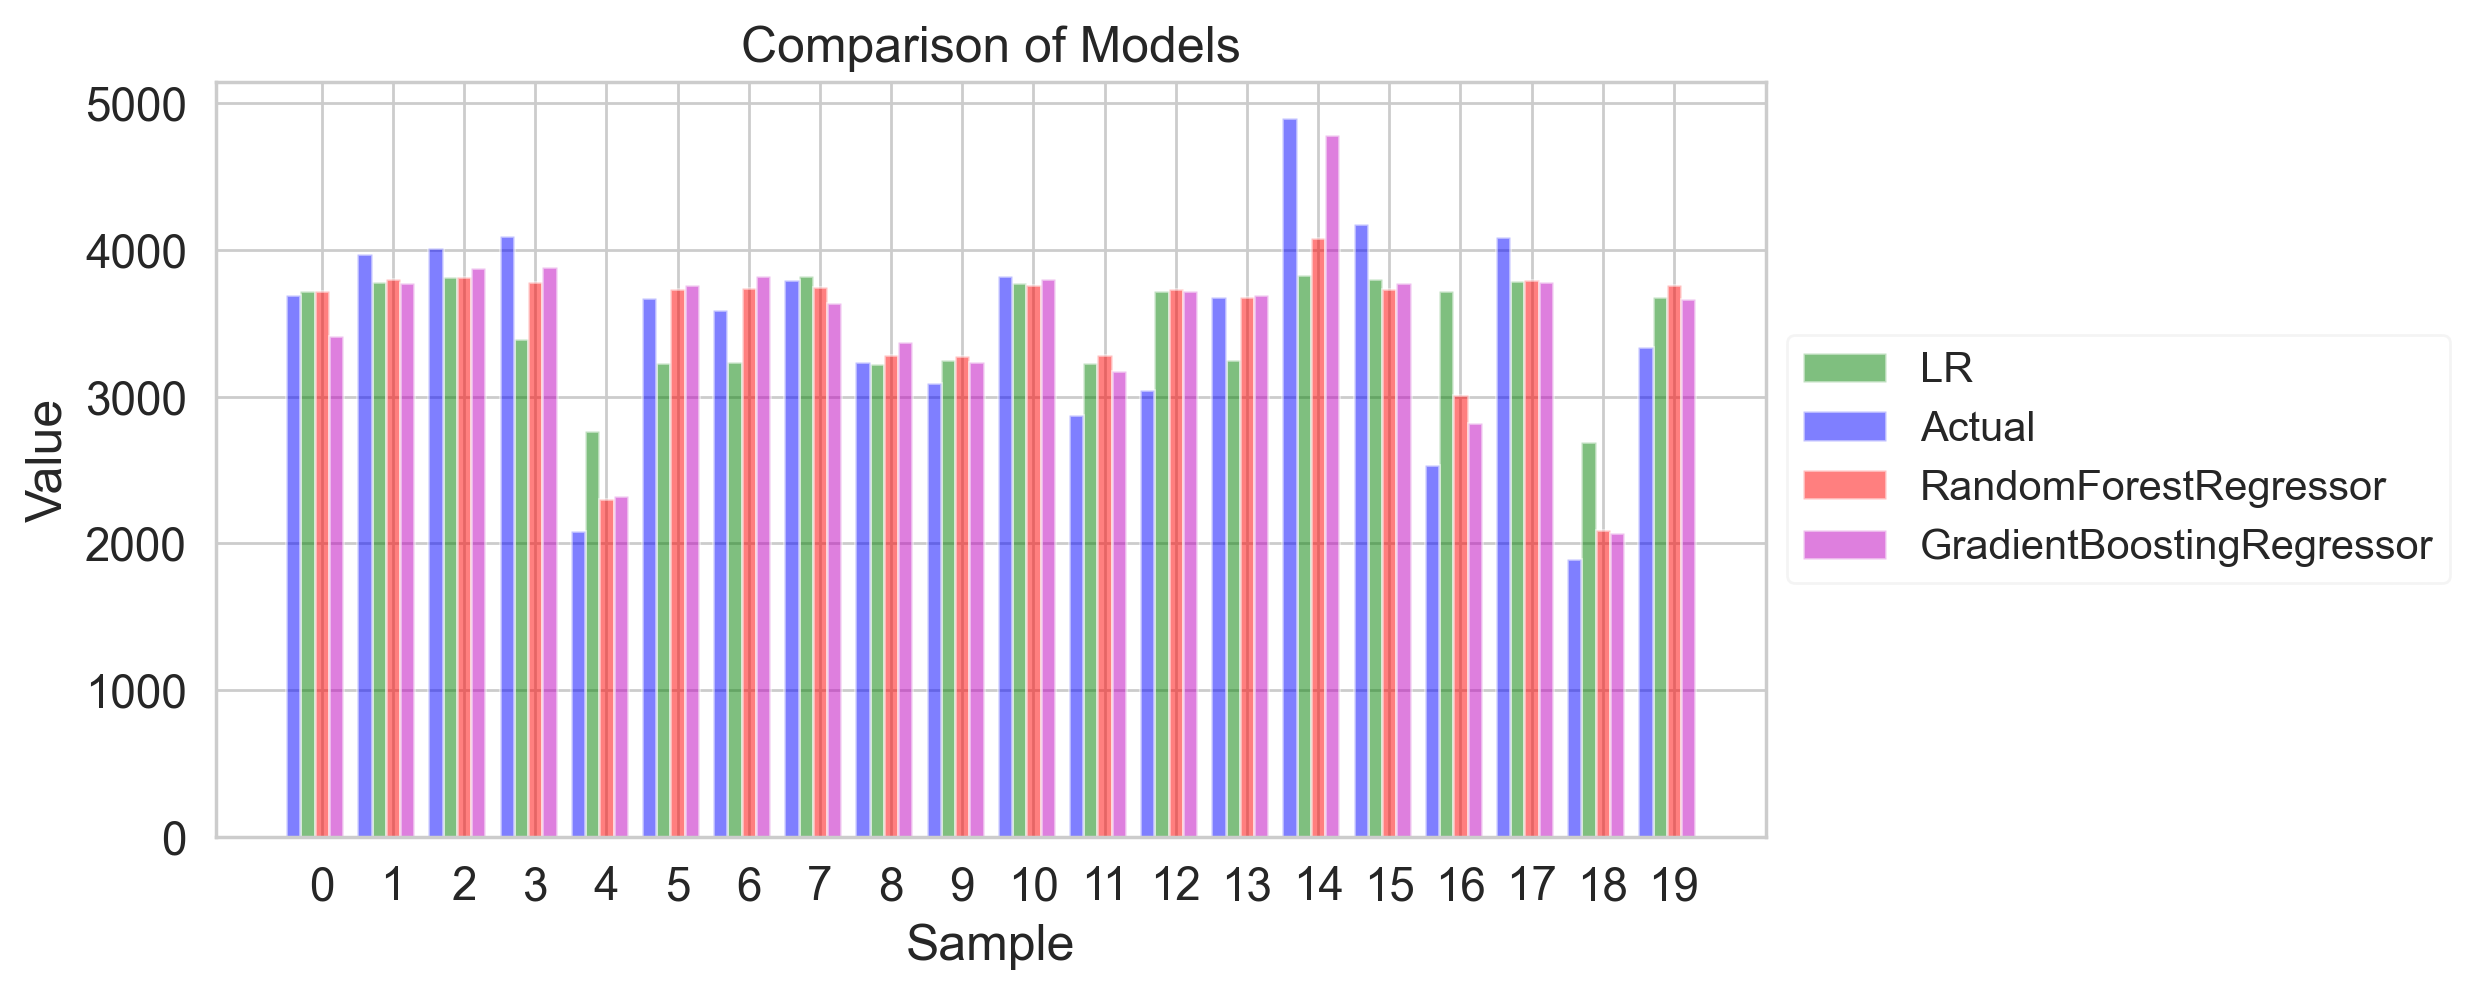

In [153]:
model_accuracy = {}
model_errors={}

# Loop through the list of models, and fit each model using GridSearchCV
y_pred_all = []

for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    y_pred_all.append(y_pred)
    model_name = model.__class__.__name__
    model_errors[model_name] = np.abs((y_test[:20] - y_pred[:20]) / y_test[:20]) * 100

# Print the results for each model
for i, (model, param_grid) in enumerate(models):
    y_pred = y_pred_all[i]
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(model.__class__.__name__)
    print("Best hyperparameters: ", grid.best_params_)
    print("Best score: ", -grid.best_score_)
    print("Test MAE: {:.3f}".format(mae))
    print("Test MAPE: {:.3f}%".format(mape * 100))
    print("Test RMSE: {:.3f}".format(rmse))
    print("Test R^2: {:.3f}".format(r2))
    print("=" * 50)



colors = [ 'r', 'm', 'y']  # Define a list of colors for each model
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bar_width = 0.2
sample_spacing = 0.6  # Set the desired spacing between samples
index = np.arange(20)

# Plot the LR model predictions
y_pred_lr = y_pred_all[0][:20]  # Get the LR model predictions
ax.bar(index + bar_width, y_pred_lr, bar_width, alpha=0.5, color='g', label='LR')

# Plot the actual values
ax.bar(index, y_test[:20], bar_width, color='b', alpha=0.5, label='Actual')

# Plot the predictions of other models
for i, (model, param_grid) in enumerate(models[1:]):
    y_pred = y_pred_all[i + 1][:20]  # Get the predictions of other models
    ax.bar(index + ((i + 2) * bar_width), y_pred, bar_width, alpha=0.5, color=colors[i], label=model.__class__.__name__)


ax.set(xlabel='Sample', ylabel='Value')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', framealpha=0.2)
ax.set_xticks(index + ((len(models) + 1) * bar_width) / 2)
ax.set_xticklabels(index)
plt.title("Comparison of Models")
plt.show()

In [154]:
conditions=weather.conditions.unique()
print(len(conditions),conditions)


7 ['Partially cloudy' 'Clear' 'Snow, Rain, Partially cloudy'
 'Rain, Partially cloudy' 'Overcast' 'Rain, Overcast'
 'Snow, Rain, Overcast']


In [155]:
features=['time','stopname','VehicleId','shour','smin','stopname1','direction',
          'time_of_day','weekday','daytype','date','temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'snow', 'snowdepth', 'windgust', 'winddir', 'windspeed', 'cloudcover',
       'conditions', 'icon']
X = onewaytime[features]
y = onewaytime['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

LinearRegression
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best score:  193.39922631147815
Test MAE: 344.020
Test MAPE: 10.350%
Test RMSE: 444.821
Test R^2: 0.418
RandomForestRegressor
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best score:  193.39922631147815
Test MAE: 240.839
Test MAPE: 7.042%
Test RMSE: 314.196
Test R^2: 0.710
GradientBoostingRegressor
Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best score:  193.39922631147815
Test MAE: 201.827
Test MAPE: 5.928%
Test RMSE: 263.702
Test R^2: 0.796


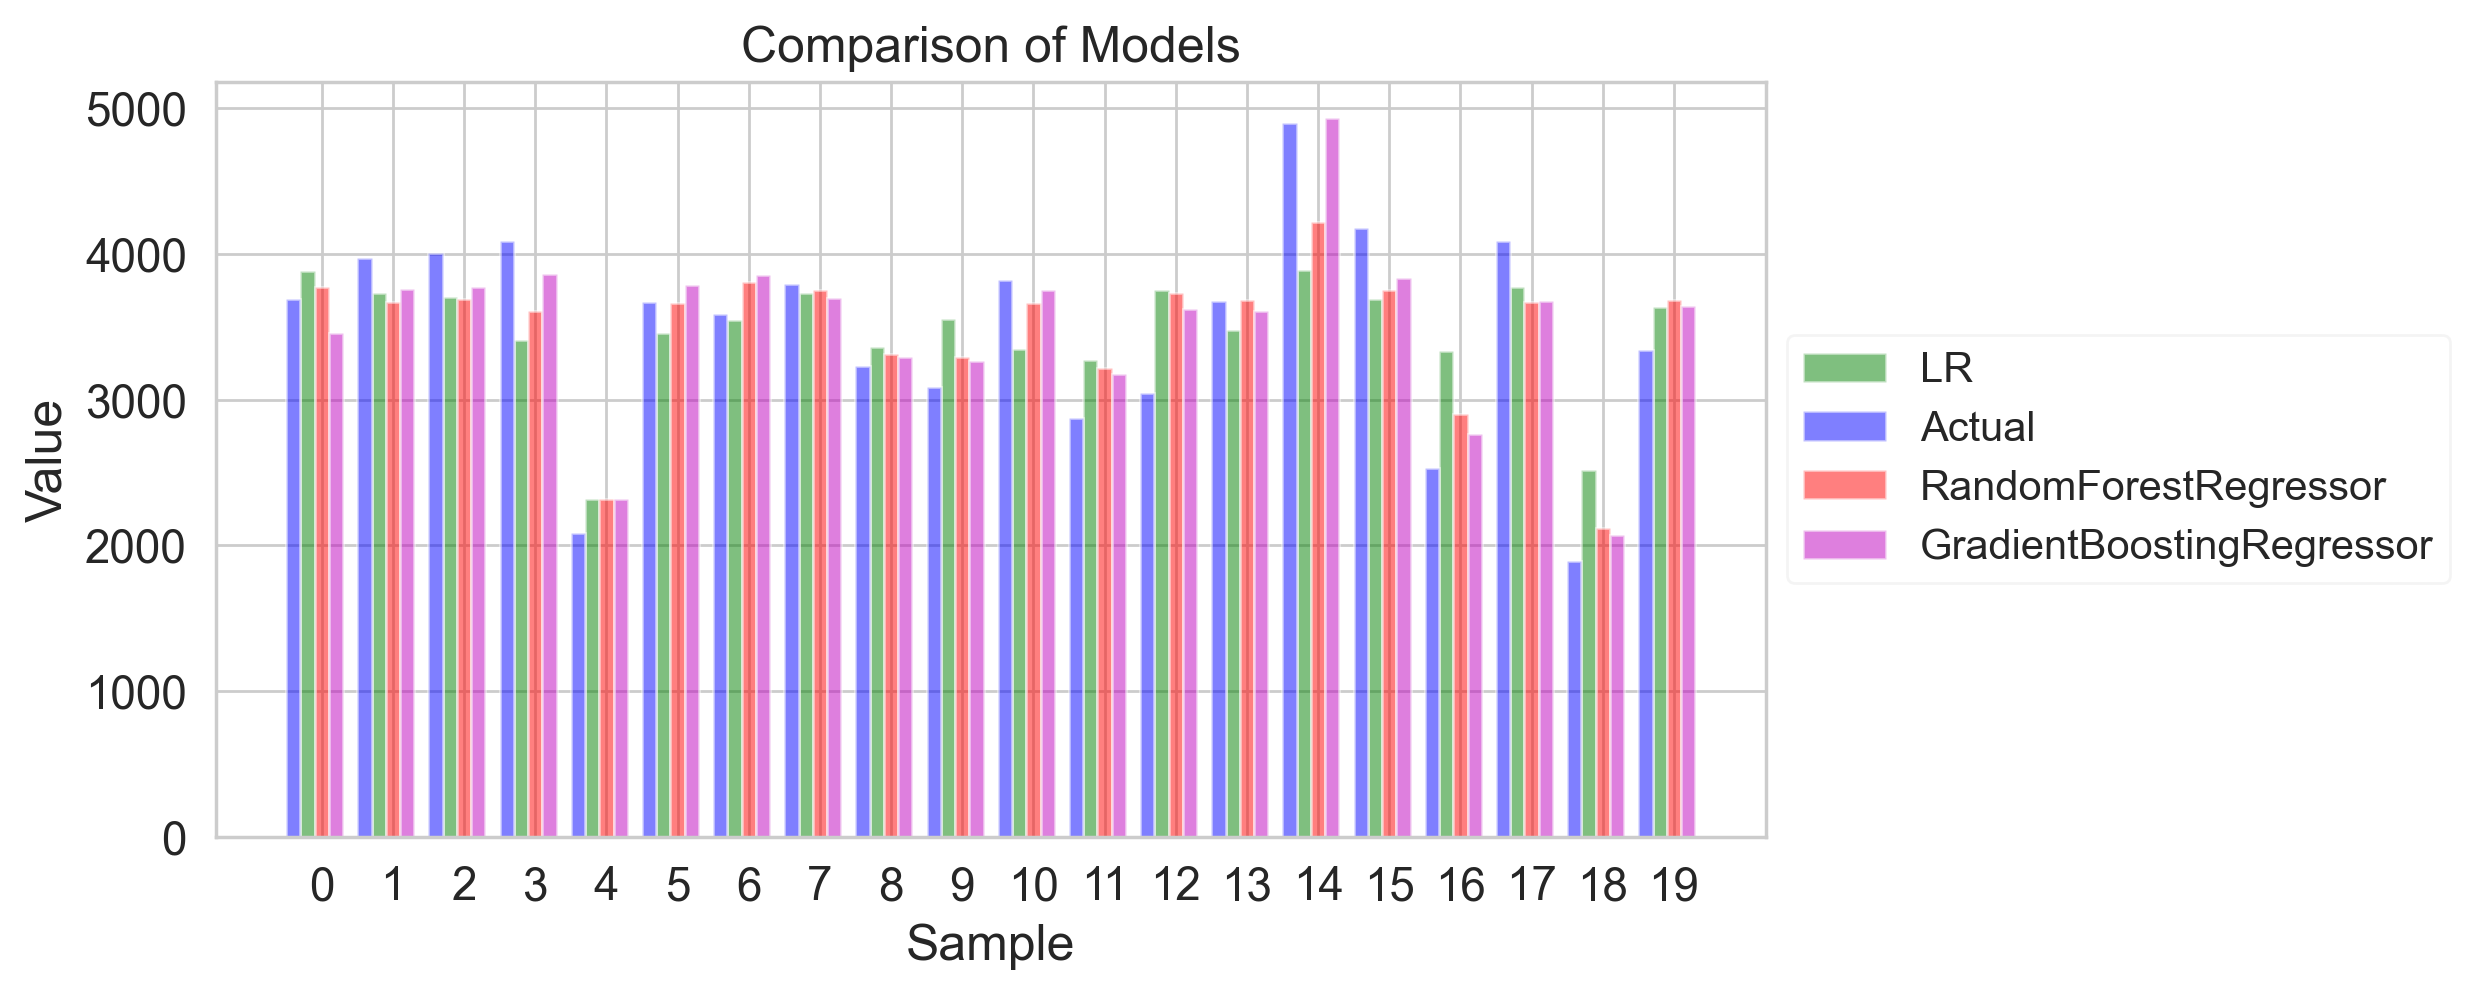

In [156]:
model_accuracy = {}
model_errors={}

# Loop through the list of models, and fit each model using GridSearchCV
y_pred_all = []

for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    y_pred_all.append(y_pred)
    model_name = model.__class__.__name__
    model_errors[model_name] = np.abs((y_test[:20] - y_pred[:20]) / y_test[:20]) * 100

# Print the results for each model
for i, (model, param_grid) in enumerate(models):
    y_pred = y_pred_all[i]
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(model.__class__.__name__)
    print("Best hyperparameters: ", grid.best_params_)
    print("Best score: ", -grid.best_score_)
    print("Test MAE: {:.3f}".format(mae))
    print("Test MAPE: {:.3f}%".format(mape * 100))
    print("Test RMSE: {:.3f}".format(rmse))
    print("Test R^2: {:.3f}".format(r2))
    print("=" * 50)



colors = [ 'r', 'm', 'y']  # Define a list of colors for each model
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bar_width = 0.2
sample_spacing = 0.6  # Set the desired spacing between samples
index = np.arange(20)

# Plot the LR model predictions
y_pred_lr = y_pred_all[0][:20]  # Get the LR model predictions
ax.bar(index + bar_width, y_pred_lr, bar_width, alpha=0.5, color='g', label='LR')

# Plot the actual values
ax.bar(index, y_test[:20], bar_width, color='b', alpha=0.5, label='Actual')

# Plot the predictions of other models
for i, (model, param_grid) in enumerate(models[1:]):
    y_pred = y_pred_all[i + 1][:20]  # Get the predictions of other models
    ax.bar(index + ((i + 2) * bar_width), y_pred, bar_width, alpha=0.5, color=colors[i], label=model.__class__.__name__)


ax.set(xlabel='Sample', ylabel='Value')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', framealpha=0.2)
ax.set_xticks(index + ((len(models) + 1) * bar_width) / 2)
ax.set_xticklabels(index)
plt.title("Comparison of Models")
plt.show()

In [157]:
shour_dummies = pd.get_dummies(onewaytime['shour'], prefix='shour')
onewaytime = pd.concat([onewaytime, shour_dummies], axis=1)


In [158]:
onewaytime.columns

Index(['time', 'stopname', 'VehicleId', 'time1', 'stopname1', 'VehicleId1',
       'duration', 'shour', 'direction', 'weekday', 'smin', 'date',
       'time_of_day', 'daytype', 'shour1', 'temp', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'snow', 'snowdepth', 'windgust',
       'winddir', 'windspeed', 'cloudcover', 'conditions', 'icon', 'shour_5',
       'shour_6', 'shour_7', 'shour_8', 'shour_9', 'shour_10', 'shour_11',
       'shour_12', 'shour_13', 'shour_14', 'shour_15', 'shour_16', 'shour_17',
       'shour_18', 'shour_5', 'shour_6', 'shour_7', 'shour_8', 'shour_9',
       'shour_10', 'shour_11', 'shour_12', 'shour_13', 'shour_14', 'shour_15',
       'shour_16', 'shour_17', 'shour_18', 'shour_5', 'shour_6', 'shour_7',
       'shour_8', 'shour_9', 'shour_10', 'shour_11', 'shour_12', 'shour_13',
       'shour_14', 'shour_15', 'shour_16', 'shour_17', 'shour_18'],
      dtype='object')

In [159]:
features=['time','stopname','VehicleId','shour','smin','stopname1','direction', 'time_of_day','weekday','daytype','date','temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'snow', 'snowdepth', 'windgust', 'winddir', 'windspeed', 'cloudcover', 'conditions', 'icon','shour_5', 'shour_6', 'shour_7', 'shour_8', 'shour_9', 'shour_10', 'shour_11', 'shour_12', 'shour_13','shour_14', 'shour_15', 'shour_16', 'shour_17', 'shour_18']
X = onewaytime[features]
y = onewaytime['duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

LinearRegression
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score:  193.4605616513365
Test MAE: 270.139
Test MAPE: 7.997%
Test RMSE: 353.606
Test R^2: 0.632
RandomForestRegressor
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score:  193.4605616513365
Test MAE: 248.076
Test MAPE: 7.250%
Test RMSE: 326.763
Test R^2: 0.686
GradientBoostingRegressor
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score:  193.4605616513365
Test MAE: 200.632
Test MAPE: 5.893%
Test RMSE: 263.922
Test R^2: 0.795


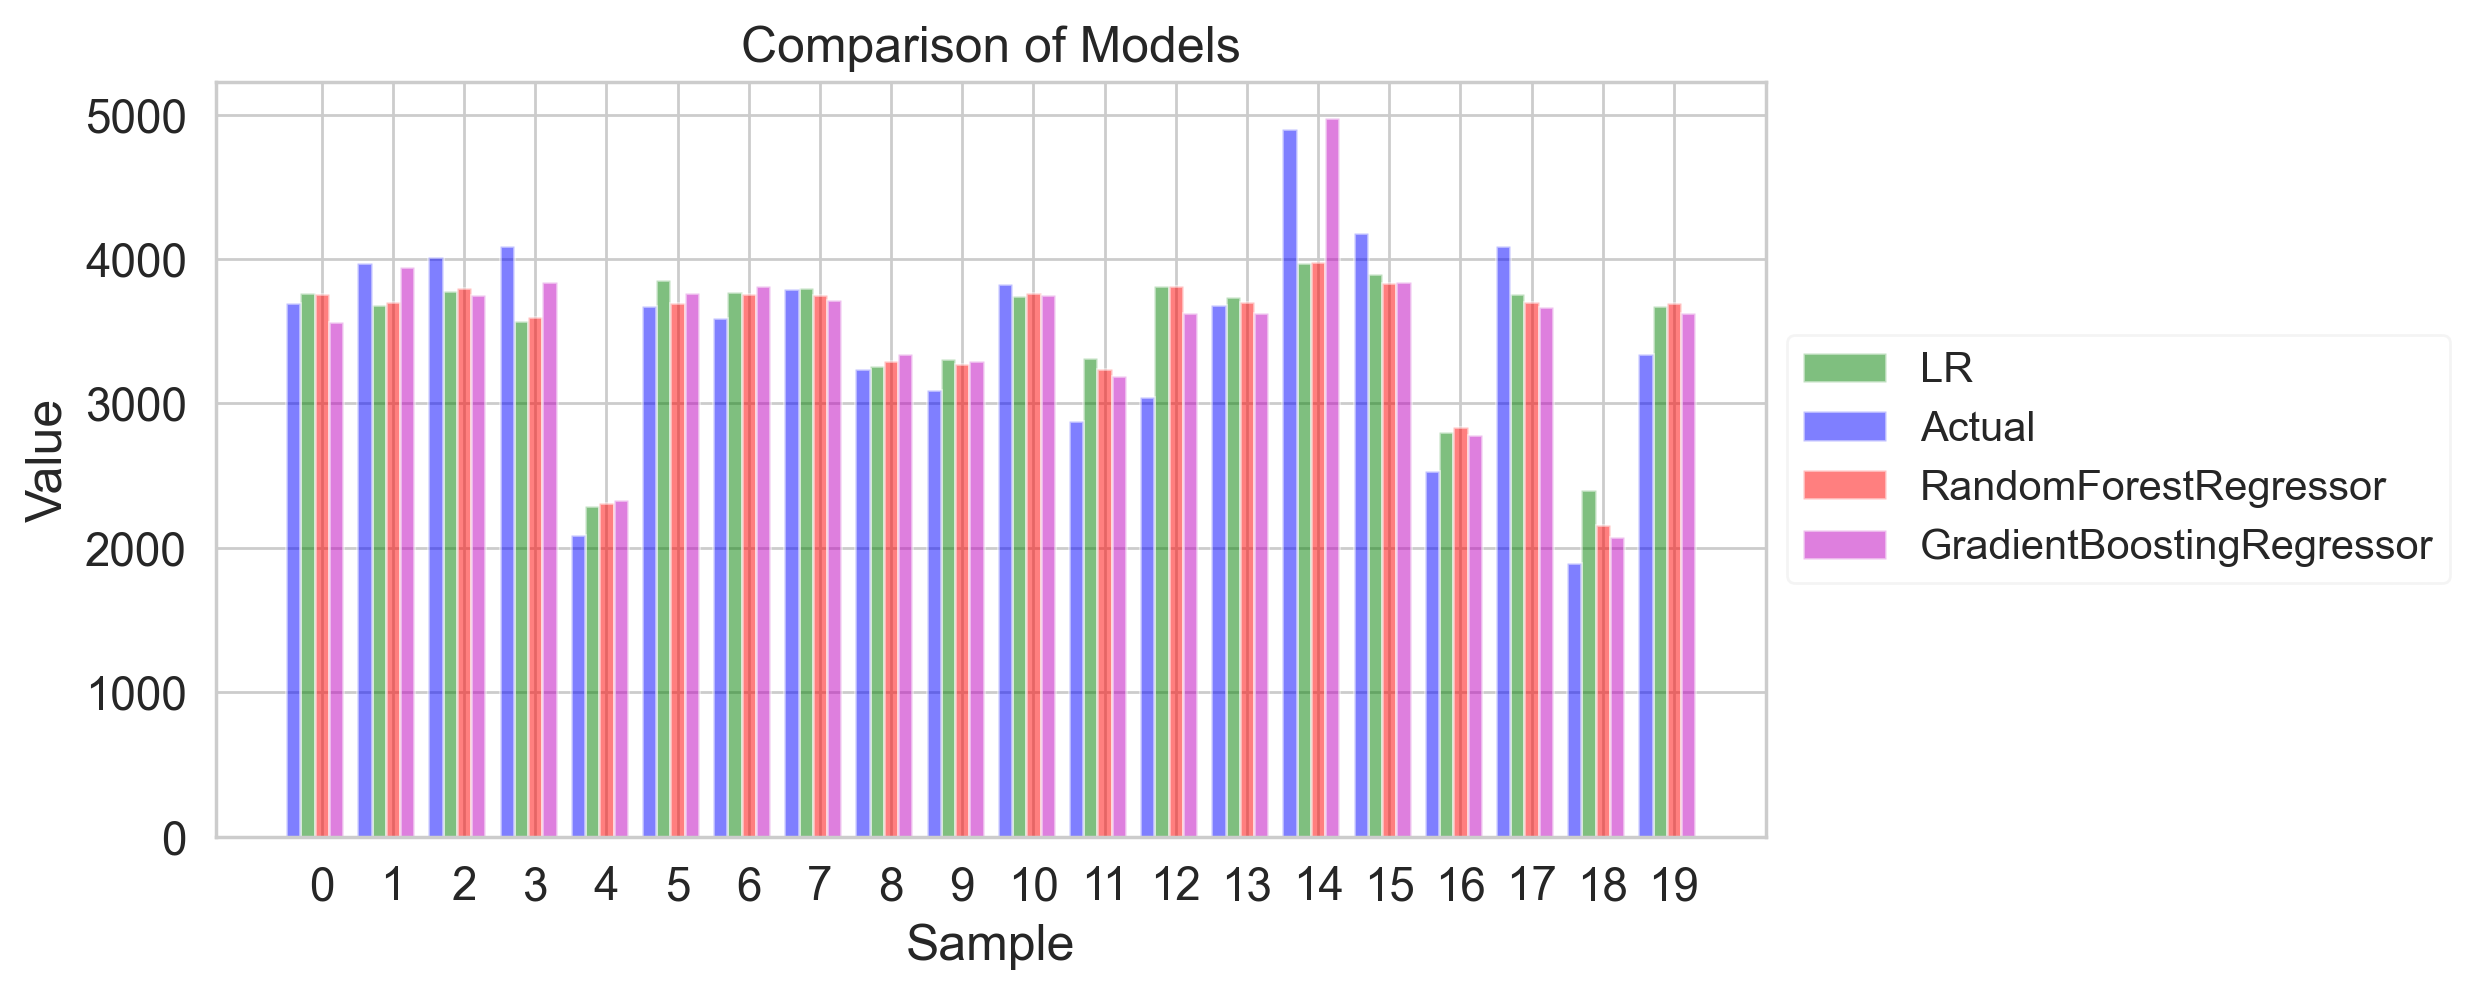

In [160]:
model_accuracy = {}
model_errors={}

# Loop through the list of models, and fit each model using GridSearchCV
y_pred_all = []

for model, param_grid in models:
    grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    y_pred_all.append(y_pred)
    model_name = model.__class__.__name__
    model_errors[model_name] = np.abs((y_test[:20] - y_pred[:20]) / y_test[:20]) * 100

# Print the results for each model
for i, (model, param_grid) in enumerate(models):
    y_pred = y_pred_all[i]
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(model.__class__.__name__)
    print("Best hyperparameters: ", grid.best_params_)
    print("Best score: ", -grid.best_score_)
    print("Test MAE: {:.3f}".format(mae))
    print("Test MAPE: {:.3f}%".format(mape * 100))
    print("Test RMSE: {:.3f}".format(rmse))
    print("Test R^2: {:.3f}".format(r2))
    print("=" * 50)



colors = [ 'r', 'm', 'y']  # Define a list of colors for each model
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
bar_width = 0.2
sample_spacing = 0.6  # Set the desired spacing between samples
index = np.arange(20)

# Plot the LR model predictions
y_pred_lr = y_pred_all[0][:20]  # Get the LR model predictions
ax.bar(index + bar_width, y_pred_lr, bar_width, alpha=0.5, color='g', label='LR')

# Plot the actual values
ax.bar(index, y_test[:20], bar_width, color='b', alpha=0.5, label='Actual')

# Plot the predictions of other models
for i, (model, param_grid) in enumerate(models[1:]):
    y_pred = y_pred_all[i + 1][:20]  # Get the predictions of other models
    ax.bar(index + ((i + 2) * bar_width), y_pred, bar_width, alpha=0.5, color=colors[i], label=model.__class__.__name__)


ax.set(xlabel='Sample', ylabel='Value')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', framealpha=0.2)
ax.set_xticks(index + ((len(models) + 1) * bar_width) / 2)
ax.set_xticklabels(index)
plt.title("Comparison of Models")
plt.show()

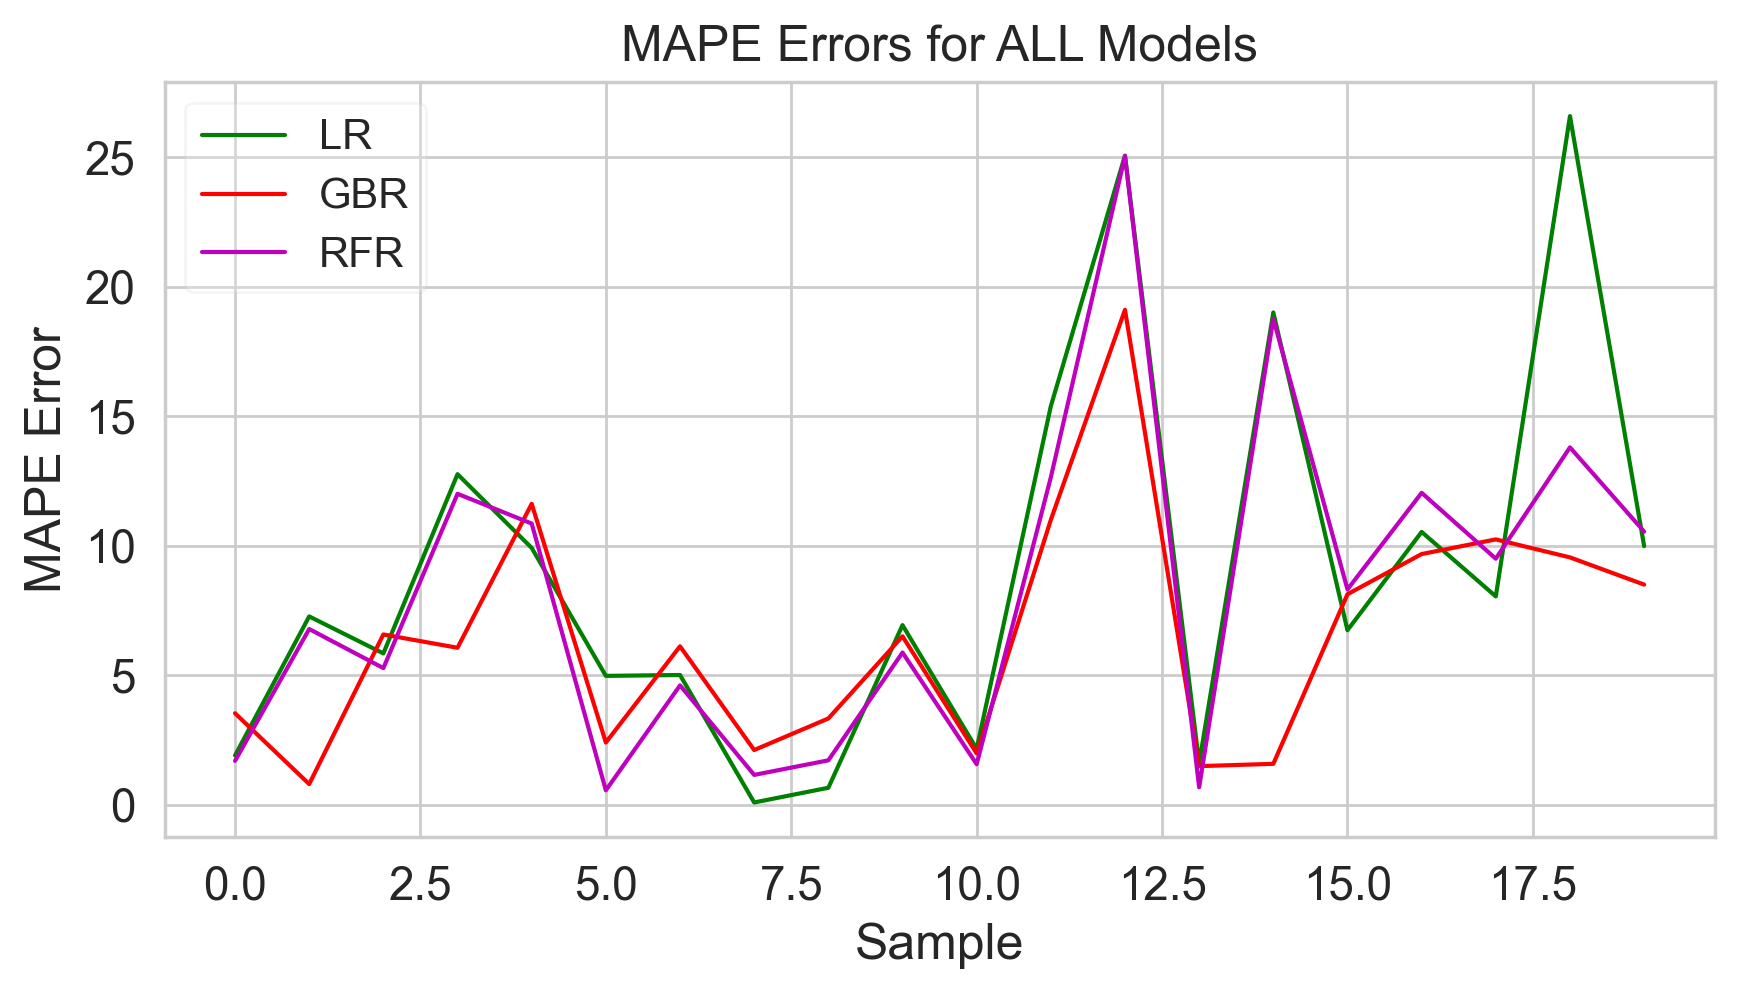

In [161]:
# Plot the MAE errors
fig, ax = plt.subplots(figsize=(8, 4), dpi=250)
# Plot the LR model MAE errors
mape_lr = model_errors['LinearRegression']
ax.plot(index, mape_lr, color='g', label='LR')


# Plot the GBR model MAE errors
mape_gbr = model_errors['GradientBoostingRegressor']
ax.plot(index, mape_gbr, color='r', label='GBR')
mape_rfr = model_errors['RandomForestRegressor']
ax.plot(index, mape_rfr, color='m', label='RFR')
ax.set(xlabel='Sample', ylabel='MAPE Error')
ax.legend(loc='upper left', fontsize='small', framealpha=0.2)
plt.title("MAPE Errors for ALL Models")
plt.show()